# 预处理

## 加载包

In [87]:
import pandas as pd 
# 预处理
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_moons
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import average_precision_score

import numpy as np
import pandas as pd
from collections import Counter

from sklearn.ensemble import RandomForestClassifier

from imblearn.datasets import make_imbalance
from imblearn.over_sampling import SMOTE, ADASYN

from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import Isomap, MDS, TSNE
from sklearn.preprocessing import StandardScaler
import seaborn as sns
# from visualize import viz_data
# 数据增强
import numpy as np

# 建模比较
from sklearn.utils import shuffle        #用于打乱表格，使用于split函数之前
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE,RFECV
from sklearn import tree
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# 采样算法
# from imblearn.datasets import make_imbalance          
from imblearn.over_sampling import KMeansSMOTE,SMOTE,SVMSMOTE                        # 增强采样
from imblearn.under_sampling import AllKNN,CondensedNearestNeighbour,NearMiss        # 欠 采样
from imblearn.combine import SMOTEENN,SMOTETomek

# 忽略烦人的红色提示
import warnings
warnings.filterwarnings("ignore")
pd.set_option('max_columns',1000)
pd.set_option('max_row',1000)

## 图像显示中文的问题
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False
import matplotlib.pyplot as plt


# 第二波建模
from sklearn.linear_model import RidgeClassifier,LogisticRegressionCV, Perceptron
from sklearn.linear_model import SGDClassifier


## 读取数据

In [88]:
df = pd.read_csv("data_original_waited_for_model.csv")
df

f1-F       f2-F       f3-F       f4-F       f5-F      f6-F  \
0     6.563571   5.218949   3.049805   1.865306   1.835347  1.847321   
1     7.106468   5.865853   3.670119   2.525670   1.757730  1.454494   
2     5.645338   3.850049   3.841687   2.821426   1.472358  1.229566   
3     5.825416   4.379153   2.254036   1.856469   1.559564  1.404999   
4     5.427525   3.245119   2.194275   1.810796   2.151785  1.537857   
5     6.481053   3.140136   1.834569   2.070658   1.813956  1.660969   
6     5.977132   3.404175   2.534500   1.649823   1.426273  1.422183   
7     6.548693   4.519413   4.220215   3.573341   2.183829  1.777440   
8     4.400474   2.825733   1.986202   1.299412   1.402458  1.835921   
9     5.271265   3.960141   2.555062   1.626180   1.301536  1.534220   
10    5.540150   3.090554   2.018193   0.933150   0.637777  0.452002   
11    2.902404   1.307604   0.800657   0.667843   0.605198  0.662919   
12    6.504219   2.710809   2.258221   1.414209   0.410901  0.423112   
13    2.487236   1.439516   1.577201   1.020079   0.760848  0.773233   
14    2.499131   1.177657   0.927153   0.950739   0.626692  0.727806   
15    2.706493   1.443828   1.350562   1.032386   0.858683  0.647472   
16    3.157382   1.413209   1.217496   0.894466   0.483632  0.474033   
17    4.093120   1.520644   0.833136   0.941199   0.607955  0.589274   
18    3.352311   1.743547   1.278361   0.789084   0.939441  0.845813   
19    6.594454   2.821067   1.611422   1.091008   0.738797  0.700309   
20    7.404556   3.680870   2.958437   3.719976   3.011786  3.294215   
21    5.385716   4.919188   8.577614   6.906911   3.160691  2.864680   
22    6.535532   6.157684   7.756414   4.399813   2.970226  3.761811   
23    5.310919   3.468067   4.790256   4.563872   3.453330  2.960412   
24   10.377501   7.084032   4.513622   5.111720   4.070040  3.185612   
25    8.330341   6.543579   6.697051   4.993723   4.857743  5.448010   
26    7.703055   7.070810   6.460716   7.912210   7.039597  6.904835   
27    9.906985   9.011810   8.115727   8.423458   6.500381  5.614459   
28    8.093306   5.639049   5.022012   4.651377   4.546170  5.025071   
29   11.082429  15.191614  15.858020  13.014374  10.198432  9.635305   
30    5.194055   2.250538   1.752779   1.766805   2.130169  2.526149   
31    4.713806   2.753494   1.873573   1.557446   2.303675  2.799354   
32    4.455434   2.776899   2.584200   2.626793   2.531660  2.685441   
33    4.398366   2.433723   2.298009   2.560607   2.051569  1.646811   
34    4.100822   4.627549   4.858707   3.148676   1.935762  1.448163   
35    4.381784   3.946265   2.315419   1.752654   2.068634  2.106432   
36    7.990422   3.468680   2.982875   3.559515   2.706455  1.593579   
37    3.255330   3.277806   3.729515   2.515317   1.966389  2.355566   
38    5.274297   2.547791   2.059502   2.391544   2.266260  2.611314   
39    4.364726   4.185047   3.121884   2.068805   3.164353  2.450759   
40    4.734957   2.938683   1.879807   1.266293   1.037885  1.080950   
41    5.180685   3.159630   2.335094   1.699101   1.481322  0.973700   
42    6.943333   3.588556   1.472276   1.847255   1.357986  0.887696   
43    5.174746   1.865508   1.639429   1.278682   1.150200  0.824890   
44    3.914219   1.870300   1.394940   1.157171   1.185152  1.293816   
45    5.944521   2.621326   1.596492   1.874871   1.577264  0.881841   
46    5.409586   2.255338   1.924393   2.276687   1.512427  1.343741   
47    6.228126   2.064207   1.616611   1.421897   1.084574  0.906618   
48    6.939838   2.713491   1.618352   1.156611   0.998681  1.015133   
49    6.379376   1.919902   1.686875   1.743987   1.018447  0.735487   
50    2.274950   1.573230   1.635612   0.925303   0.561529  0.503867   
51    1.696711   1.278679   1.384489   1.524147   1.282818  0.612377   
52    3.023720   2.083159   1.067768   0.731176   0.724607  0.494827   
53    4.388426   1.795816   1.556164   0.952802   0.958237  0.789963   
54    3.065029   2.445437   1.607887   1.002559   

需要修改的内容如下：
①丢弃浓度项目 ②丢弃sample列

## 定义函数

In [89]:
# 得分计算函数
def round_score(score):
    return np.round(score, 3)


# 降维展示函数
def data_enhance_display(Xtest, df_D, fig_names,location):
    """
    Xtest：去重的多维度特征数据
    df_D：与Xtest对应的 标签数据，两列，一个是Label 一个是最后一列表明是不是增强采样得到的
    fig_name: 绘制图像的名字
    """

    # 实例化降维器
    pca = PCA(n_components=2, random_state=123)
    
    kpca = KernelPCA(
        n_components=2,
        kernel="poly",  ## 核函数为rbf核
        gamma=0.2,
        random_state=123)
    
    isomap = Isomap(
        n_neighbors=2,  ## 每个点考虑的近邻数量
        n_components=2)  ## 降维到3维空间中
    
    tsne = TSNE(
        n_components=2,
        perplexity=25,  ## TSNE进行数据的降维,降维到3维空间中
        early_exaggeration=3,
        random_state=123)
    
    mds = MDS(n_components=2, dissimilarity="euclidean",
              random_state=123)  ## MDS进行数据的降维,降维到3维空间中

    model_estimators = [pca, kpca, isomap, tsne, mds]

    Xtest_tmp = StandardScaler().fit_transform(Xtest)
    # 五种方法进行循环展示
    for (name, method) in zip(fig_names, model_estimators): #五种循环的方法
#         print(Xtest)
        tmp_X = method.fit_transform(Xtest_tmp)
        X_test_MDS = pd.DataFrame(tmp_X,columns=["Features_1","Features_2"])
        
        df_fig = pd.concat([df_D,X_test_MDS],axis=1)
        plt.figure(dpi= 100)
        sns.set_style("whitegrid")

        #尝试修改一下颜色
        pall = sns.color_palette(['#73a2c6', '#f4777f'])
        sns.set_palette(pall)

        sns.scatterplot(data=df_fig, x="Features_1", y="Features_2", hue="label")
        plt.xticks(fontsize=12); plt.yticks(fontsize=12)
        plt.title(name+" Display", fontsize=18)
        plt.xlabel("Feature_1",fontsize=15)
        plt.ylabel("Feature_2",fontsize=15)
        plt.savefig(location+name+".png",bbox_inches="tight")
        plt.show()


fig_names = ["PCA", "KPCA", "ISOMAP", "T-SNE", "MDS"]
# fig_names = ["ISOMAP","T-SNE","MDS"]

## 模型评价函数===========================================
def cv_score(X_train, y_train, random_state=42):
    model = RandomForestClassifier(n_estimators=1000, max_depth=9, random_state=random_state)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

    score_funcs = [
        'accuracy',
        'precision',
        'recall',
        'roc_auc'
    ]

    scores = cross_validate(model, X_train, y_train, scoring=score_funcs, cv=cv, return_estimator=True)
    print('Mean Accuracy:', round_score(scores['test_accuracy'].mean()))
    print('Mean Precision:', round_score(scores['test_precision'].mean()))
    print('Mean Recall:', round_score(scores['test_recall'].mean()))
    print('Mean ROC AUC:', round_score(scores['test_roc_auc'].mean()))
    
    return scores

def predict_mean_score(scores, X_test):
    pred_scores = []
    for i in range(len(scores['estimator'])):
        model = scores['estimator'][i]
        pred = model.predict_proba(X_test)
        pred_scores.append(pred)
    pred_score = np.mean(pred_scores, axis=0)
    
    return pred_score


In [90]:
from scipy import stats
# p-value比较函数
def pvalue(df,X):
    """
    df 总 DataFrame
    X 是X
    """
    feature_list = []
    feature_values = []
    for i in X.columns.values:
        # 合并做总表
        df_X = df[i]
        plotdata = pd.concat([Y,df_X],axis=1)
        # 提取出两个部分的数据
        plotdata_umami = plotdata.query('label == 1')
        plotdata_bitter = plotdata.query('label == 0')
    #     print(plotdata_bitter)
        # 通过K-S检验判断是不是同分布
        static, value= stats.ks_2samp(plotdata_umami[i],plotdata_bitter[i])
        print(f"{i},,,,,{stats.ks_2samp(plotdata_umami[i],plotdata_bitter[i])}")
        feature_values.append(value)
        if value <= 0.05:
            feature_list.append(i)
    print(feature_list);print(len(feature_list))

    #绘制一下values的分布情况
    fig = sns.kdeplot(feature_values, shade=True, color="g", label="Cyl=4", alpha=.7)
    return feature_list,fig

# 试试自己的颜色
import matplotlib
import matplotlib.colors as col
import matplotlib.cm as cm
import matplotlib.pyplot as plt
def heatmap_fig(df,location):
    # 热图比较函数
    cmap2 = col.LinearSegmentedColormap.from_list('red_blue_j', [
        '#5681b9', '#73a2c6', '#93c4d2', '#b9e5dd', '#ffd3bf', '#ffa59e',
        '#f4777f', '#dd4c65'
    ])
    # extra arguments are N=256, gamma=1.0
    cm.register_cmap(cmap=cmap2)
    # we can skip name here as it was already defined
    cm.get_cmap('red_blue_j')
    plt.figure(figsize=(6, 5),dpi=300)
    fig = sns.heatmap(df.corr(), cmap="red_blue_j")
    plt.savefig(location,bbox_inches="tight") 
    return fig

# 原始数据探索

## 可视化
### kde可视化

In [91]:
df = pd.read_csv("data_original_waited_for_model.csv")
df
x = df.iloc[:,:-1]   # 不要最后一列的数据
Y = df[["label"]]     # 提取标签
columns = x.columns
columns

Index(['f1-F', 'f2-F', 'f3-F', 'f4-F', 'f5-F', 'f6-F', 'f7-F', 'f8-F', 'f9-F',
       'f10-F',
       ...
       'f16-PO', 'f17-PO', 'f18-PO', 'f19-PO', 'f20-PO', 'f21-PO', 'f22-PO',
       'f23-PO', 'f24-PO', 'f25-PO'],
      dtype='object', length=125)

In [92]:
# 得到label的数量
counter = Counter(df["label"])
counter

Counter({0: 39, 1: 231})

In [93]:
pwd

'C:\\Users\\Alex\\Desktop\\00-分子模拟自己写的教参\\77_计算机笔记\\科研代码保管\\doc.-ben_-wu\\Code_Final_原始数据'

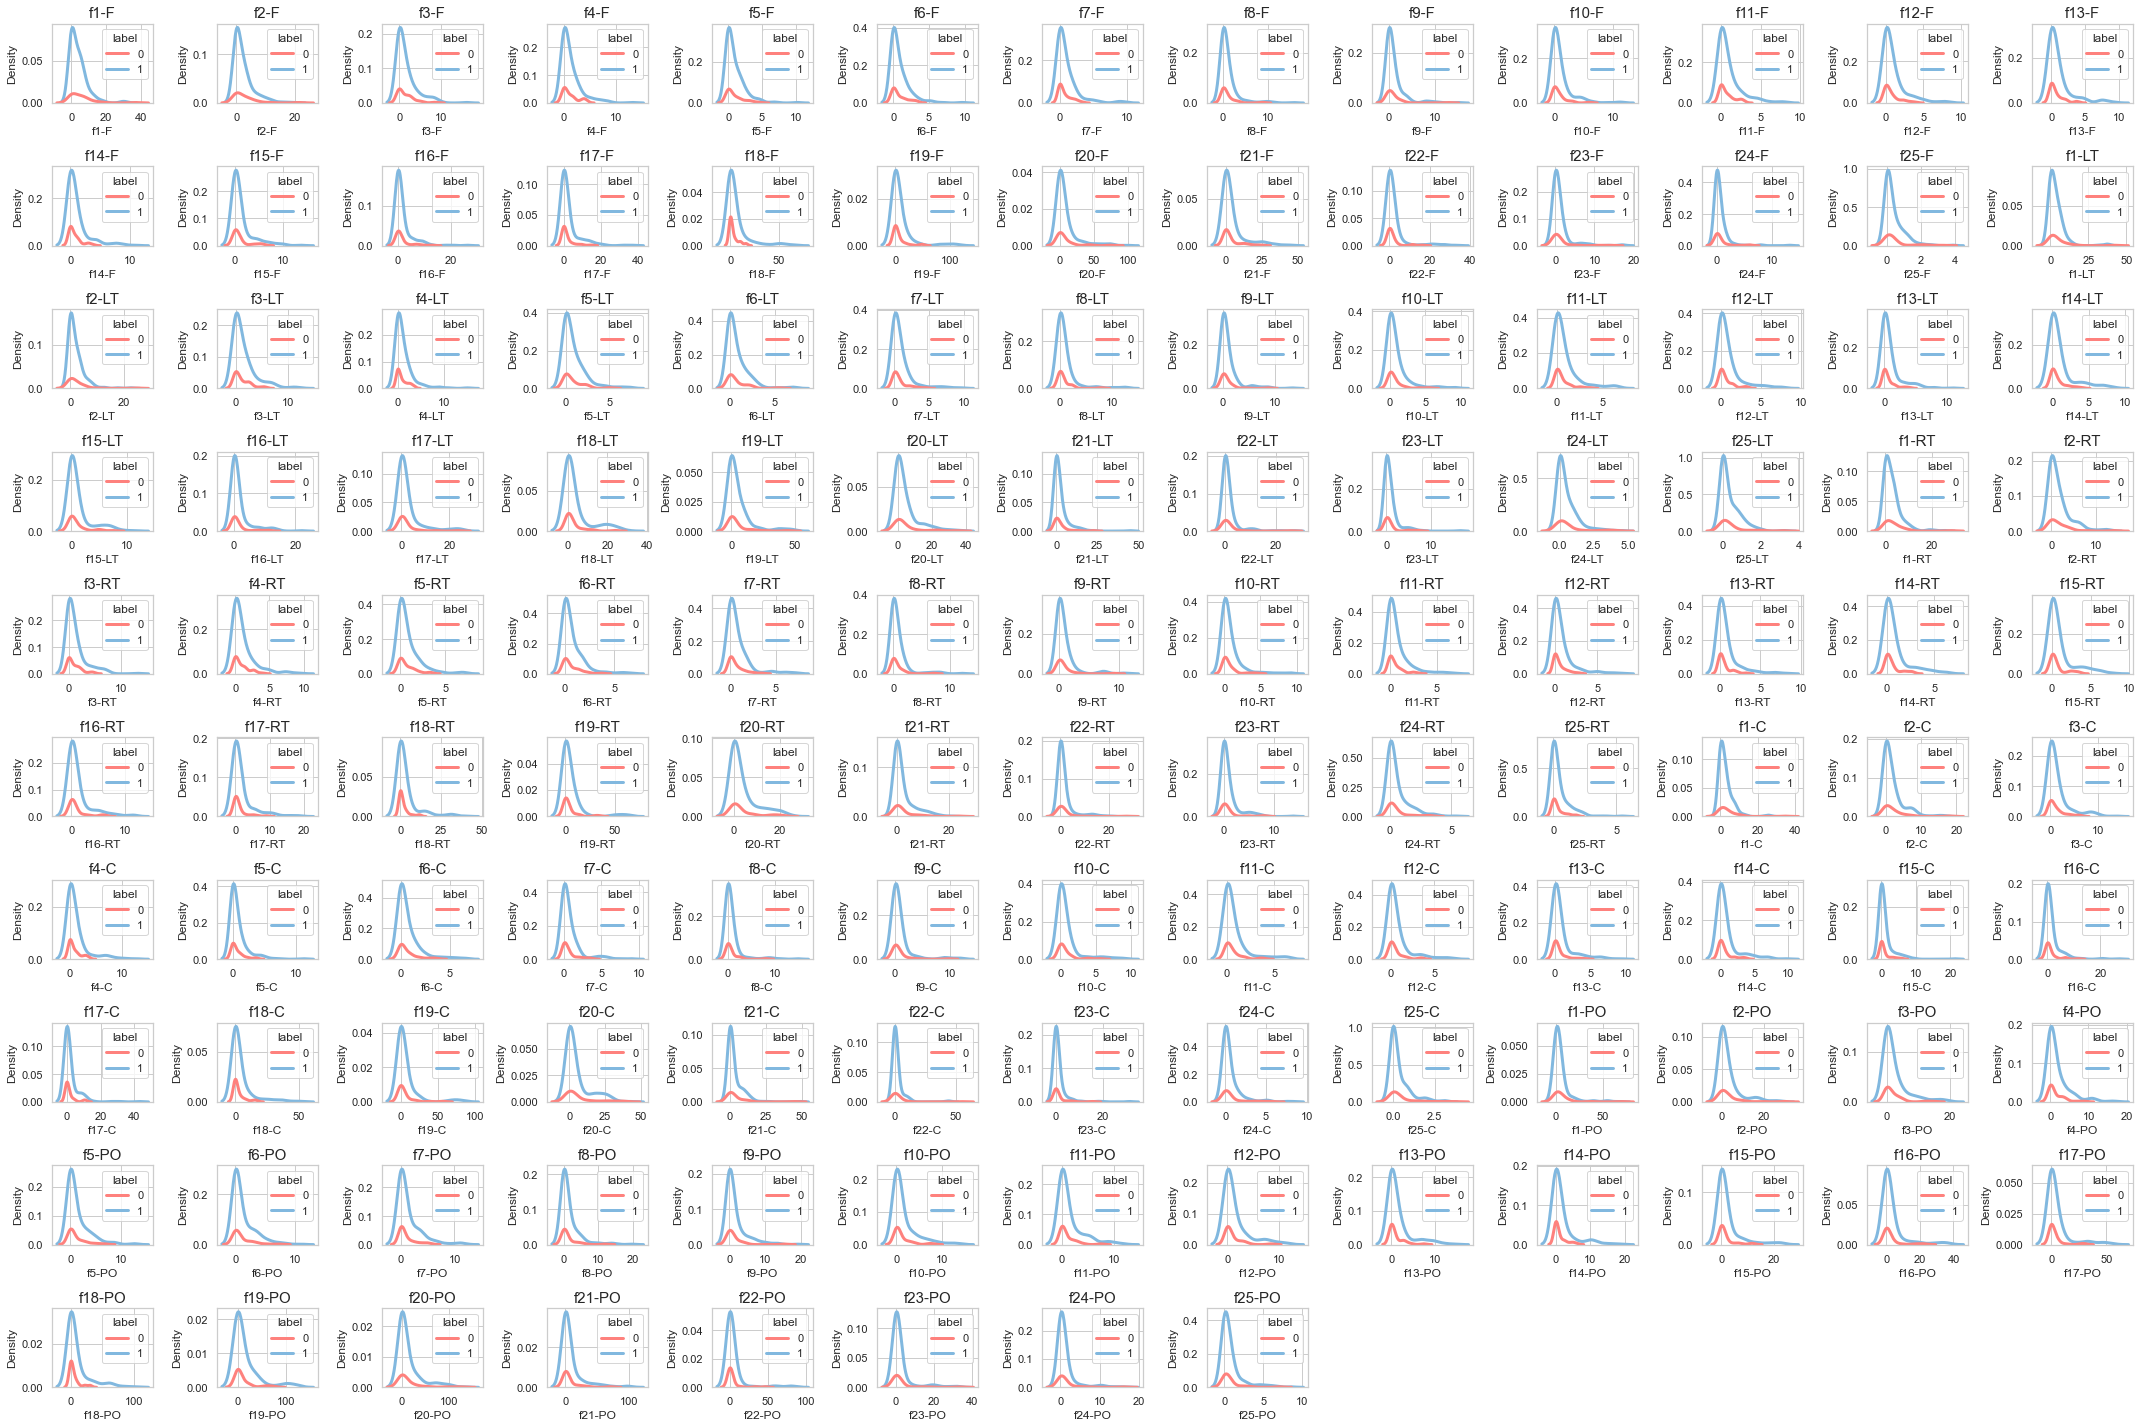

In [94]:
pal2 = sns.color_palette(['#FE817D', '#81B8DF'])
sns.set_palette(pal2)

fig = plt.figure(figsize=(30,20))
for ii, name in enumerate(columns):
    plt.subplot(10, 13, ii + 1)
    sns.kdeplot(data=df, x=name, hue="label", lw=3, bw=0.4)
    plt.title(name, fontsize=15)

plt.tight_layout()
plt.savefig("Fig\\0_原始数据\\全分布图.png",bbox_inches="tight")
plt.show()

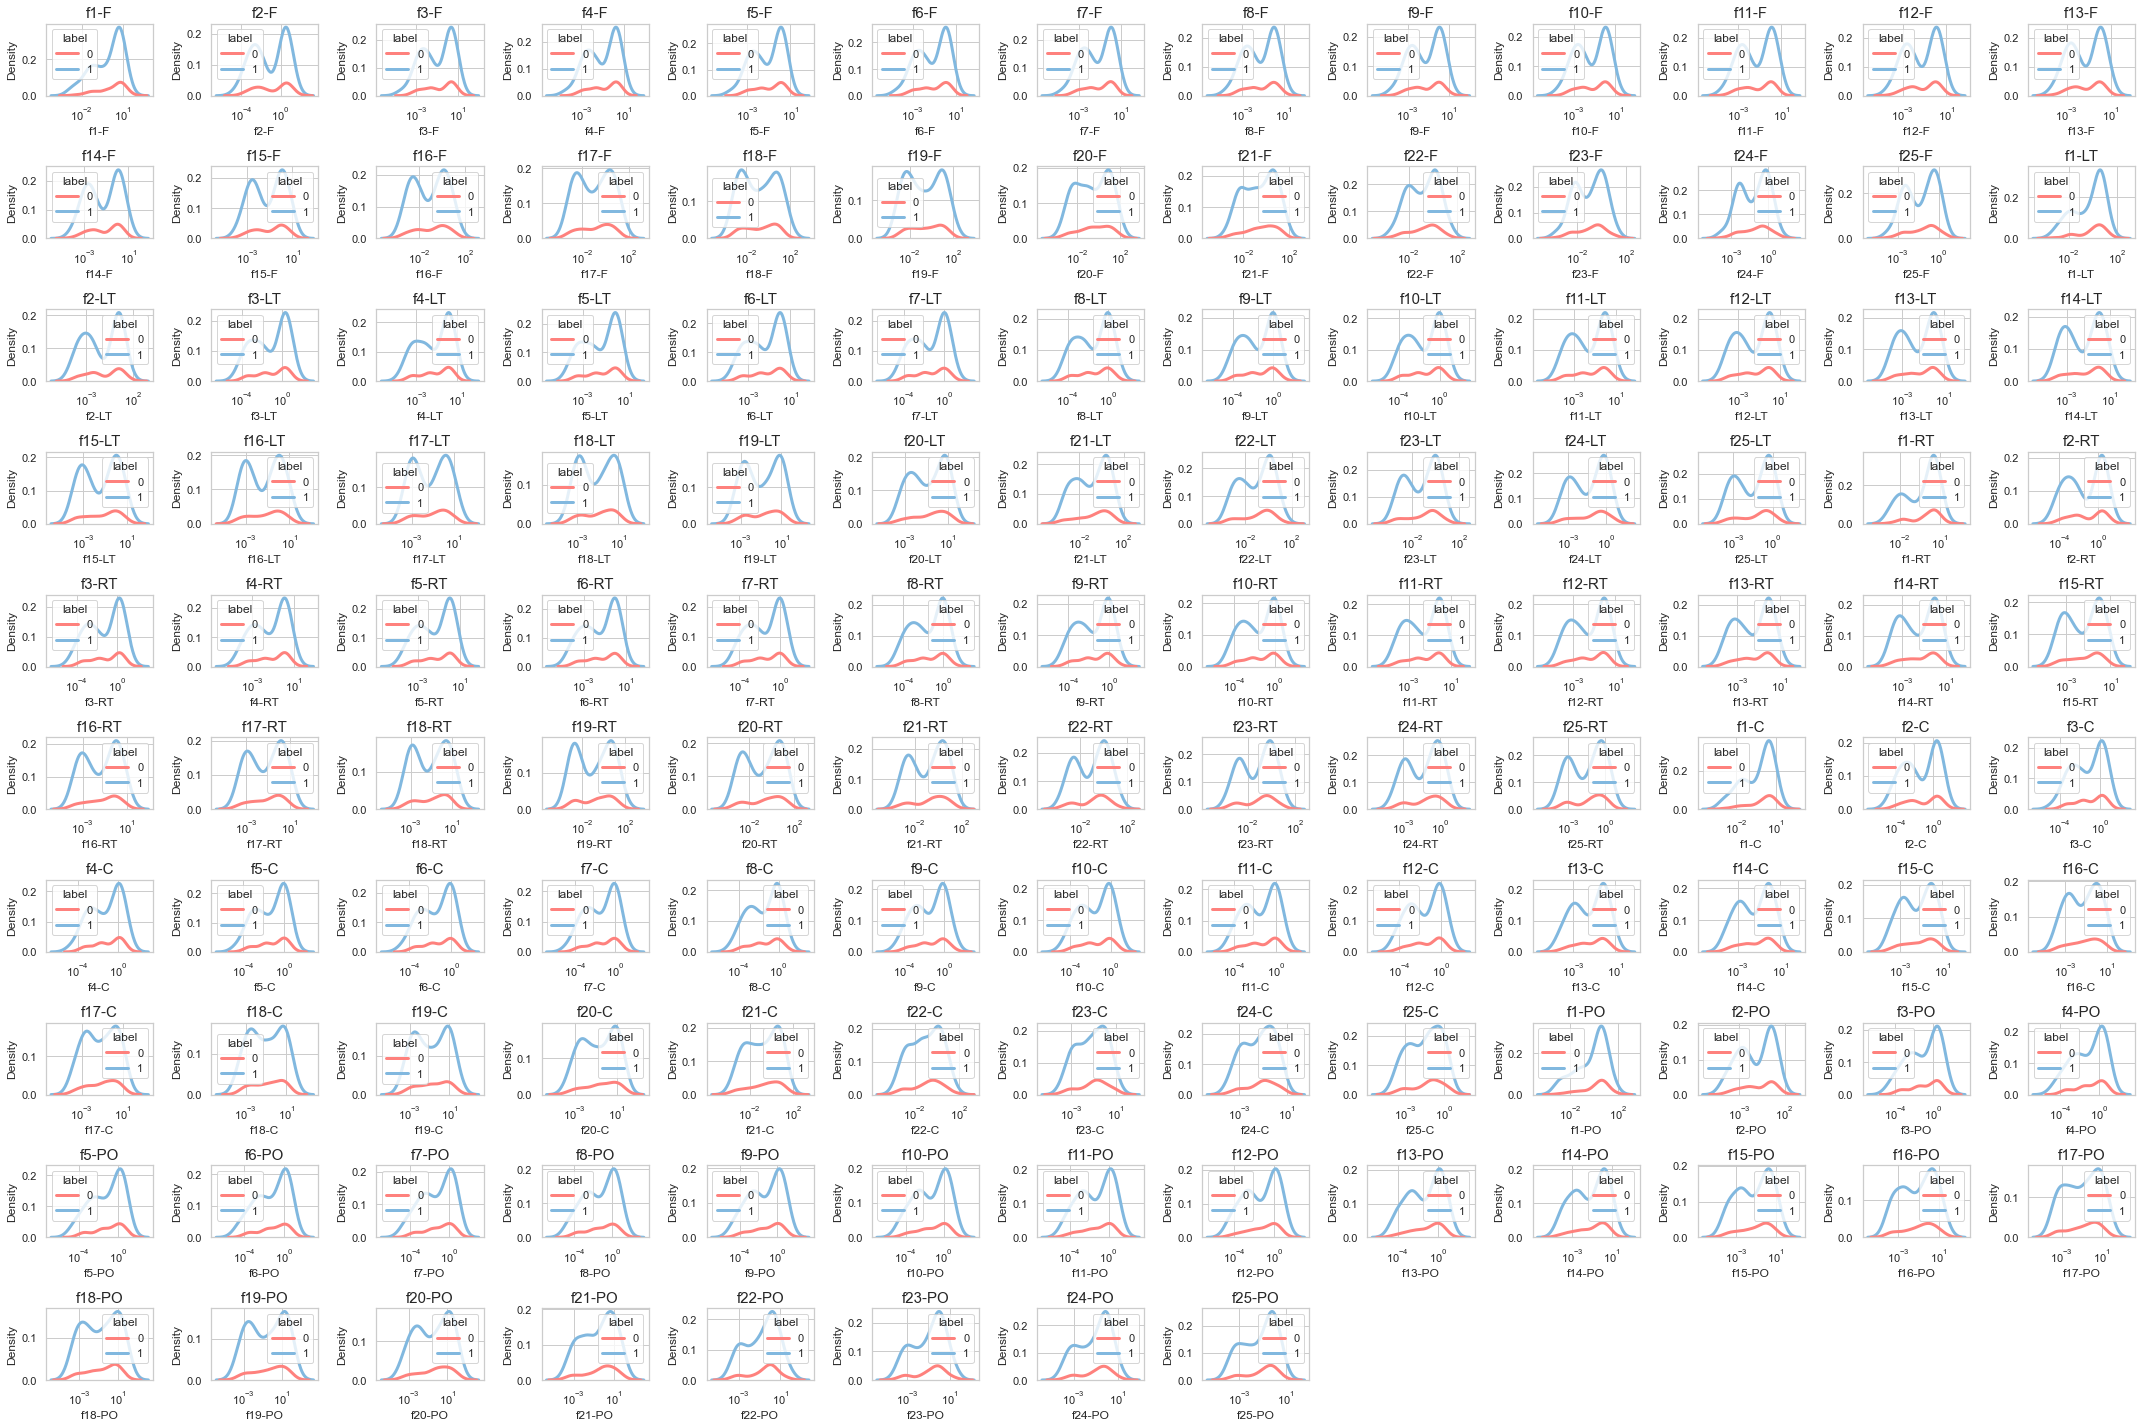

In [95]:
pal2 = sns.color_palette(['#FE817D', '#81B8DF'])
sns.set_palette(pal2)

fig = plt.figure(figsize=(30,20))
for ii, name in enumerate(columns):
    plt.subplot(10, 13, ii + 1)
    sns.kdeplot(data=df, x=name, hue="label", lw=3, bw=0.4, log_scale=True)
    plt.title(name, fontsize=15)

plt.tight_layout()
plt.savefig("Fig\\0_原始数据\\log化全分布图.png",bbox_inches="tight")
plt.show()

### 降维可视化

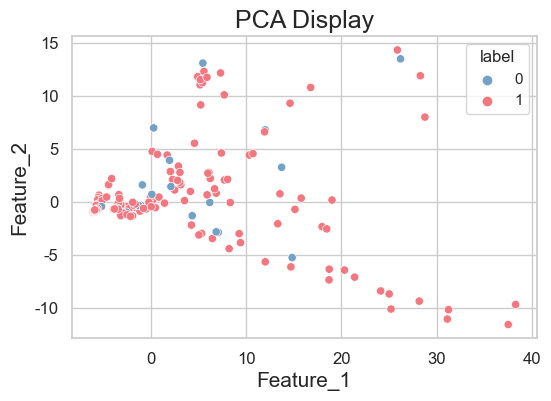

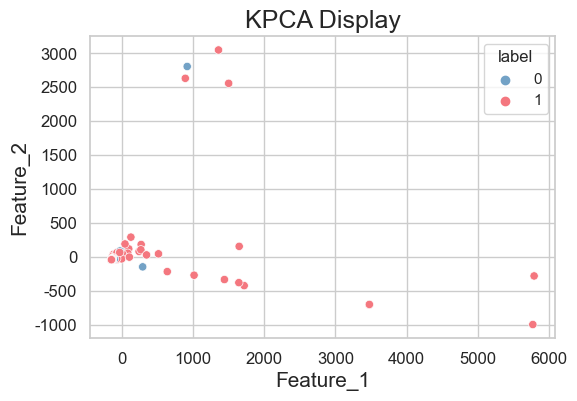

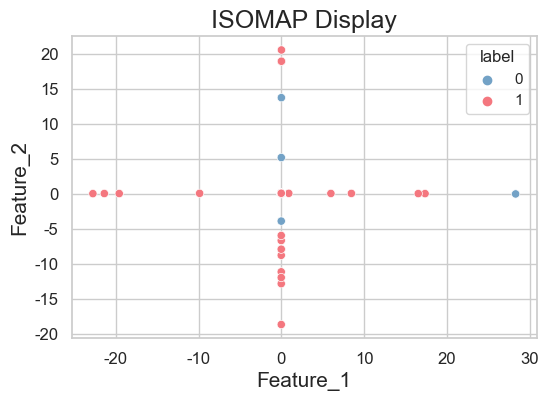

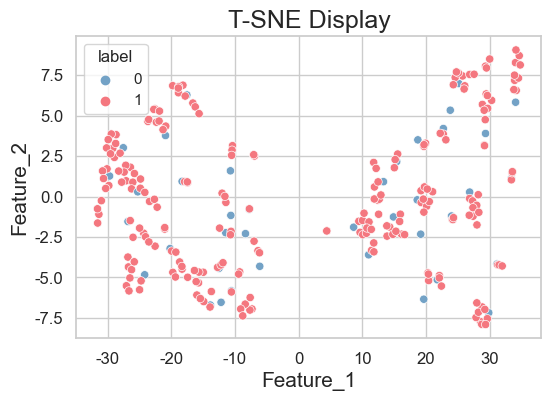

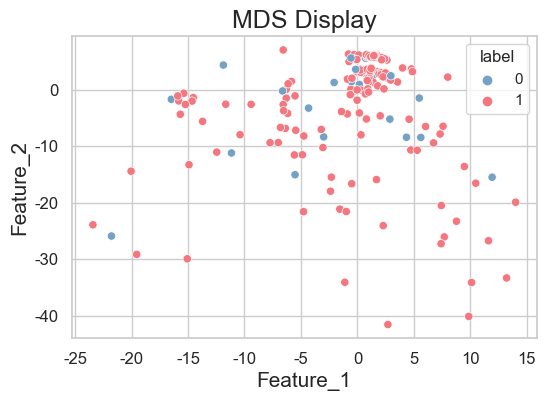

In [96]:
location = "Fig\\0_原始数据\\"
data_enhance_display(x, Y, fig_names,location)

## Pvalue比较

f1-F,,,,,KstestResult(statistic=0.18048618048618048, pvalue=0.1989808059635899)
f2-F,,,,,KstestResult(statistic=0.15018315018315018, pvalue=0.395551865095895)
f3-F,,,,,KstestResult(statistic=0.15451215451215453, pvalue=0.3616800832048548)
f4-F,,,,,KstestResult(statistic=0.15417915417915418, pvalue=0.364118192620453)
f5-F,,,,,KstestResult(statistic=0.14985014985014986, pvalue=0.39809213291666157)
f6-F,,,,,KstestResult(statistic=0.14985014985014986, pvalue=0.39809213291666157)
f7-F,,,,,KstestResult(statistic=0.15018315018315018, pvalue=0.395551865095895)
f8-F,,,,,KstestResult(statistic=0.15884115884115885, pvalue=0.3297218800956546)
f9-F,,,,,KstestResult(statistic=0.14552114552114553, pvalue=0.4338947004526912)
f10-F,,,,,KstestResult(statistic=0.16716616716616717, pvalue=0.2737527794107313)
f11-F,,,,,KstestResult(statistic=0.17582417582417584, pvalue=0.2231826795002836)
f12-F,,,,,KstestResult(statistic=0.19314019314019315, pvalue=0.14359992233012842)
f13-F,,,,,KstestResult(statistic=0.15

f25-PO,,,,,KstestResult(statistic=0.14185814185814186, pvalue=0.46599879895337226)
[]
0


[]

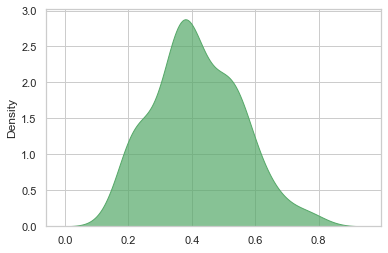

In [97]:
df_original_tmp,original_fig = pvalue(df,x)
df_original_tmp

## 热图比较

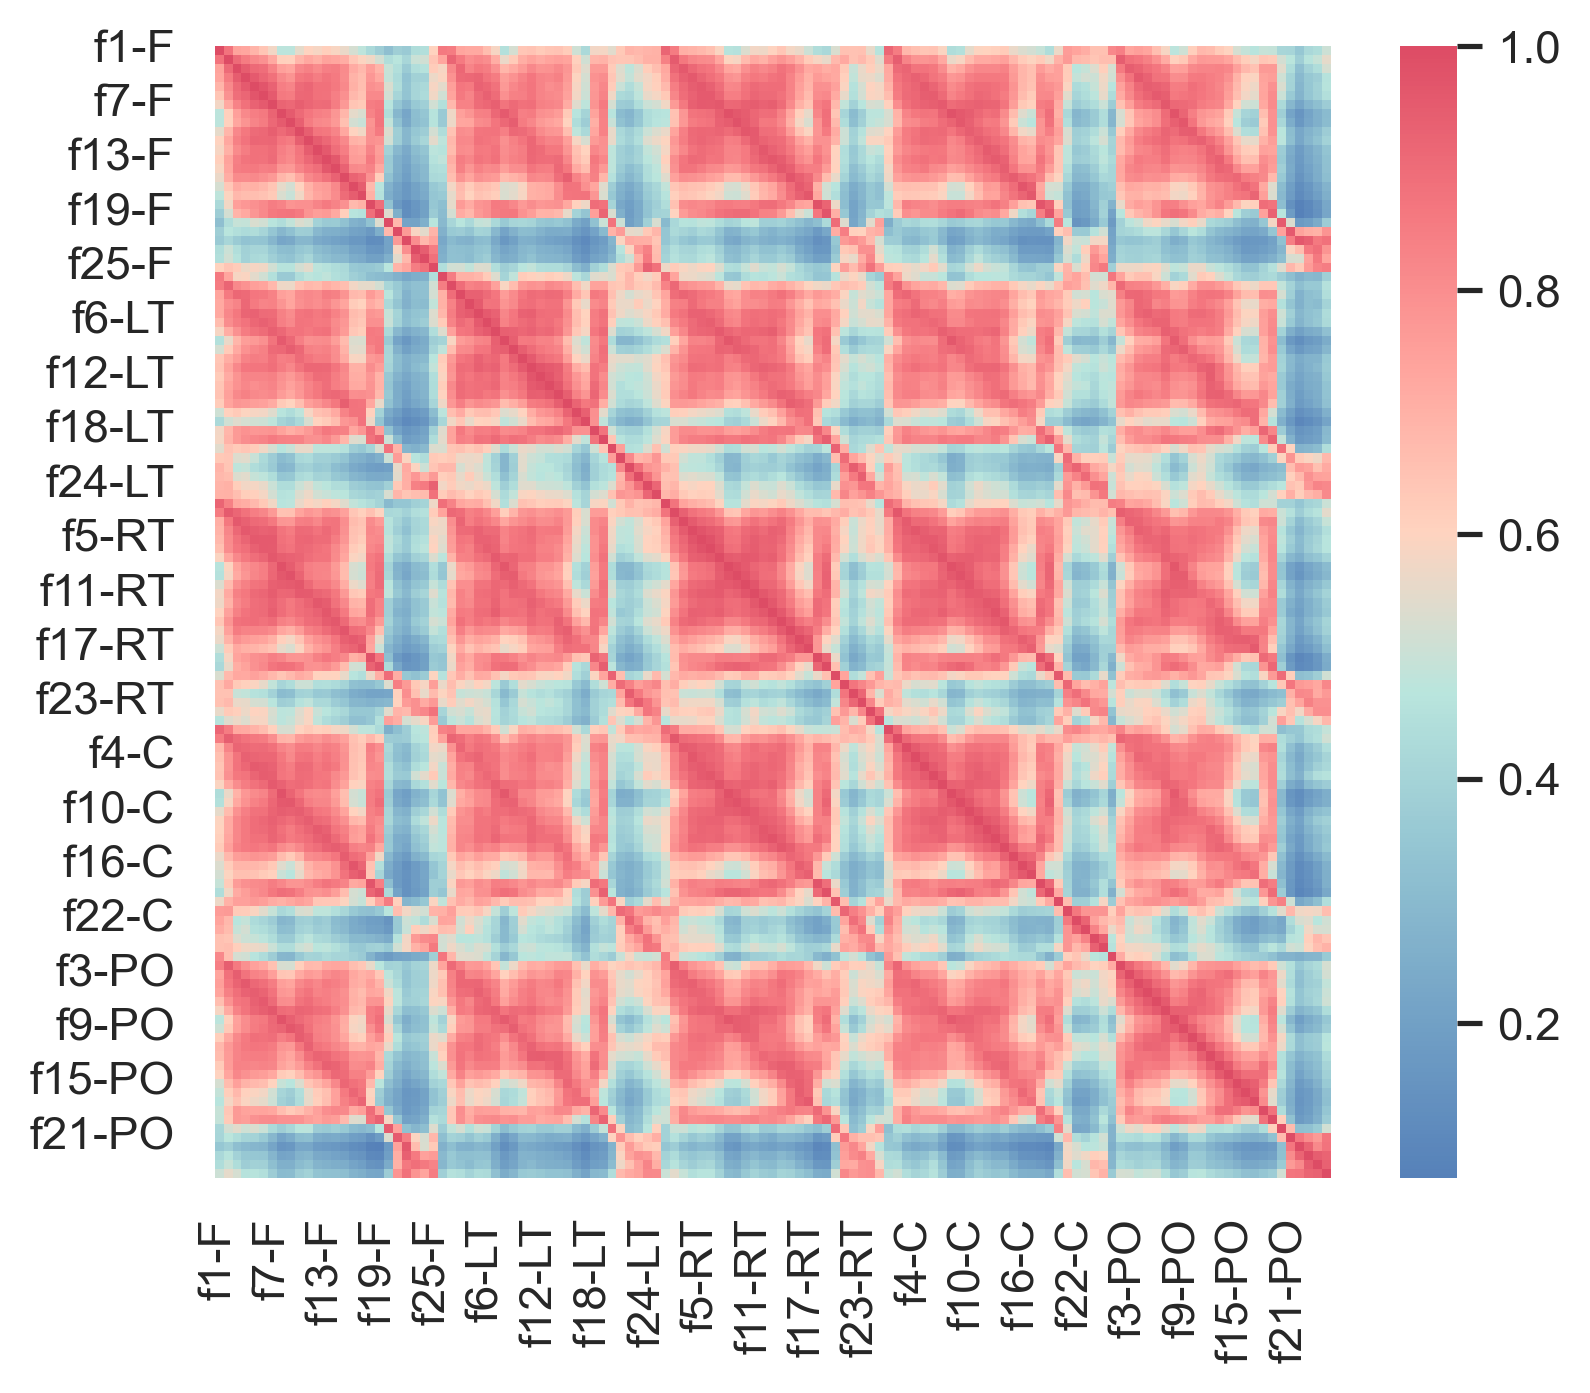

In [98]:
location = "Fig\\0_原始数据\\热图.png"
heatmap_2 = heatmap_fig(x,location)

## 原始数据建模建模比较

In [99]:
X_train, X_test, y_train, y_test = train_test_split(
    x, Y, test_size=0.2, random_state=0, stratify=df["label"], shuffle=True   # y_imbalance 是 label的那一列
)
scores = cv_score(X_train, y_train, random_state=42)
pred_score = predict_mean_score(scores, X_test)
average_precision = average_precision_score(y_test, pred_score[:, 1])
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Mean Accuracy: 0.857
Mean Precision: 0.857
Mean Recall: 1.0
Mean ROC AUC: 0.465
Average precision-recall score: 0.90


In [100]:
# 我来做一个记录模块，但是记录结果
df_original = pd.DataFrame({
    "Accuracy": [round_score(scores['test_accuracy'].mean())],
    "Precision": [round_score(scores['test_precision'].mean())],
    "Recall": [round_score(scores['test_recall'].mean())],
    "ROC AUC": [round_score(scores['test_roc_auc'].mean())]
})
df_original

Accuracy  Precision  Recall  ROC AUC
0     0.857      0.857     1.0    0.465

In [101]:
tmp_original = df_original.T
tmp_original.columns = ['original']
tmp_original

original
Accuracy      0.857
Precision     0.857
Recall        1.000
ROC AUC       0.465

# 原始数据PCA研究
## 降维
### 降维的损失研究

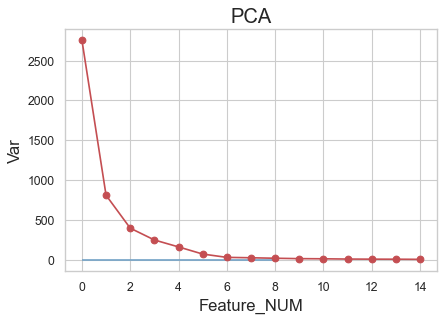

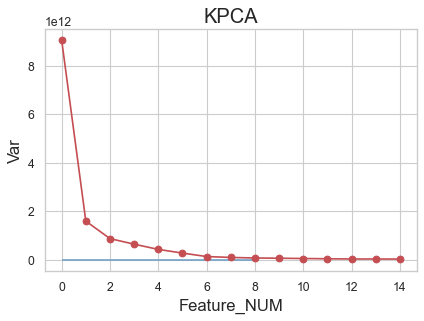

In [102]:
fig_names = ["PCA","KPCA"]
pca = PCA(n_components = 15,random_state = 123)
kpca = KernelPCA(n_components = 15,kernel = "poly", ## 核函数为rbf核
             gamma = 0.2,random_state = 123)
model_estimators = [pca,kpca]
for (name, method) in zip(fig_names, model_estimators): #五种循环的方法
    method.fit(x)

    if name == "PCA":
        exvar = method.explained_variance_
    if name =="KPCA":
        exvar = method.lambdas_

    plt.figure(dpi= 80)       #figsize=()
    plt.plot(exvar,"r-o") 
    plt.hlines(y = 1, xmin = 0, xmax = 8)
    plt.xlabel("Feature_NUM",fontsize=15)
    plt.ylabel("Var",fontsize=15)
    plt.title(name, fontsize=18)
    plt.savefig("Fig\\1_原始数据_pca\\"+name+"损失函数.png",bbox_inches="tight")
    plt.show()

### 降维的建模结果

In [103]:
score_funcs = [
        'accuracy',
        'precision',
        'recall',
        'roc_auc',
        "precision-recall"]
tmp = np.zeros((10,5))
df_scores = pd.DataFrame(tmp,index=range(1,11),columns=score_funcs)   #  这样得到一个十轮的函数

for i in range(1, 11):
    df = pd.read_csv("data_original_waited_for_model.csv")
    x = df.iloc[:, :-1]  # 不要最后一列的数据
    Y = df[["label"]]  # 提取标签
    print(f"这是第{i}维度PCA")
    pca = PCA(n_components=i, random_state=123)
    x_tmp = pca.fit_transform(x)
    X_train, X_test, y_train, y_test = train_test_split(
        x_tmp,
        Y,
        test_size=0.2,
        random_state=0,
        stratify=Y,
        shuffle=True  # y_imbalance 是 label的那一列
    )
    scores = cv_score(X_train, y_train, random_state=42)
    
    # 开始给df 
    for name in score_funcs:
        if name != "precision-recall":
            df_scores[name].iloc[i-1] = round_score(scores["test_"+name].mean())
        else:
            pred_score = predict_mean_score(scores, X_test)
            average_precision = average_precision_score(y_test, pred_score[:, 1])
            print('Average precision-recall score: {0:0.2f}'.format(average_precision))
            df_scores["precision-recall"].iloc[i-1]=round_score(average_precision)

df_scores

这是第1维度PCA
Mean Accuracy: 0.746
Mean Precision: 0.837
Mean Recall: 0.87
Mean ROC AUC: 0.428
Average precision-recall score: 0.95
这是第2维度PCA
Mean Accuracy: 0.838
Mean Precision: 0.857
Mean Recall: 0.973
Mean ROC AUC: 0.432
Average precision-recall score: 0.90
这是第3维度PCA
Mean Accuracy: 0.847
Mean Precision: 0.855
Mean Recall: 0.989
Mean ROC AUC: 0.493
Average precision-recall score: 0.87
这是第4维度PCA
Mean Accuracy: 0.852
Mean Precision: 0.856
Mean Recall: 0.995
Mean ROC AUC: 0.45
Average precision-recall score: 0.86
这是第5维度PCA
Mean Accuracy: 0.847
Mean Precision: 0.855
Mean Recall: 0.989
Mean ROC AUC: 0.55
Average precision-recall score: 0.90
这是第6维度PCA
Mean Accuracy: 0.842
Mean Precision: 0.858
Mean Recall: 0.978
Mean ROC AUC: 0.54
Average precision-recall score: 0.93
这是第7维度PCA
Mean Accuracy: 0.838
Mean Precision: 0.854
Mean Recall: 0.978
Mean ROC AUC: 0.513
Average precision-recall score: 0.92
这是第8维度PCA
Mean Accuracy: 0.838
Mean Precision: 0.854
Mean Recall: 0.978
Mean ROC AUC: 0.512
Average p

accuracy  precision  recall  roc_auc  precision-recall
1      0.746      0.837   0.870    0.428             0.948
2      0.838      0.857   0.973    0.432             0.895
3      0.847      0.855   0.989    0.493             0.874
4      0.852      0.856   0.995    0.450             0.862
5      0.847      0.855   0.989    0.550             0.899
6      0.842      0.858   0.978    0.540             0.927
7      0.838      0.854   0.978    0.513             0.918
8      0.838      0.854   0.978    0.512             0.935
9      0.833      0.853   0.973    0.510             0.943
10     0.838      0.854   0.978    0.489             0.945

In [104]:
df_scores["label"]=1
for i in range(1,11):
    df_scores["label"].iloc[i-1] = i
df_scores

accuracy  precision  recall  roc_auc  precision-recall  label
1      0.746      0.837   0.870    0.428             0.948      1
2      0.838      0.857   0.973    0.432             0.895      2
3      0.847      0.855   0.989    0.493             0.874      3
4      0.852      0.856   0.995    0.450             0.862      4
5      0.847      0.855   0.989    0.550             0.899      5
6      0.842      0.858   0.978    0.540             0.927      6
7      0.838      0.854   0.978    0.513             0.918      7
8      0.838      0.854   0.978    0.512             0.935      8
9      0.833      0.853   0.973    0.510             0.943      9
10     0.838      0.854   0.978    0.489             0.945     10

In [105]:
df_tmp = df_scores.melt(id_vars="label")
df_tmp

label          variable  value
0       1          accuracy  0.746
1       2          accuracy  0.838
2       3          accuracy  0.847
3       4          accuracy  0.852
4       5          accuracy  0.847
5       6          accuracy  0.842
6       7          accuracy  0.838
7       8          accuracy  0.838
8       9          accuracy  0.833
9      10          accuracy  0.838
10      1         precision  0.837
11      2         precision  0.857
12      3         precision  0.855
13      4         precision  0.856
14      5         precision  0.855
15      6         precision  0.858
16      7         precision  0.854
17      8         precision  0.854
18      9         precision  0.853
19     10         precision  0.854
20      1            recall  0.870
21      2            recall  0.973
22      3            recall  0.989
23      4            recall  0.995
24      5            recall  0.989
25      6            recall  0.978
26      7            recall  0.978
27      8            recall  0.978
28      9            recall  0.973
29     10            recall  0.978
30      1           roc_auc  0.428
31      2           roc_auc  0.432
32      3           roc_auc  0.493
33      4           roc_auc  0.450
34      5           roc_auc  0.550
35      6           roc_auc  0.540
36      7           roc_auc  0.513
37      8           roc_auc  0.512
38      9           roc_auc  0.510
39     10           roc_auc  0.489
40      1  precision-recall  0.948
41      2  precision-recall  0.895
42      3  precision-recall  0.874
43      4  precision-recall  0.862
44      5  precision-recall  0.899
45      6  precision-recall  0.927
46      7  precision-recall  0.918
47      8  precision-recall  0.935
48      9  precision-recall  0.943
49     10  precision-recall  0.945

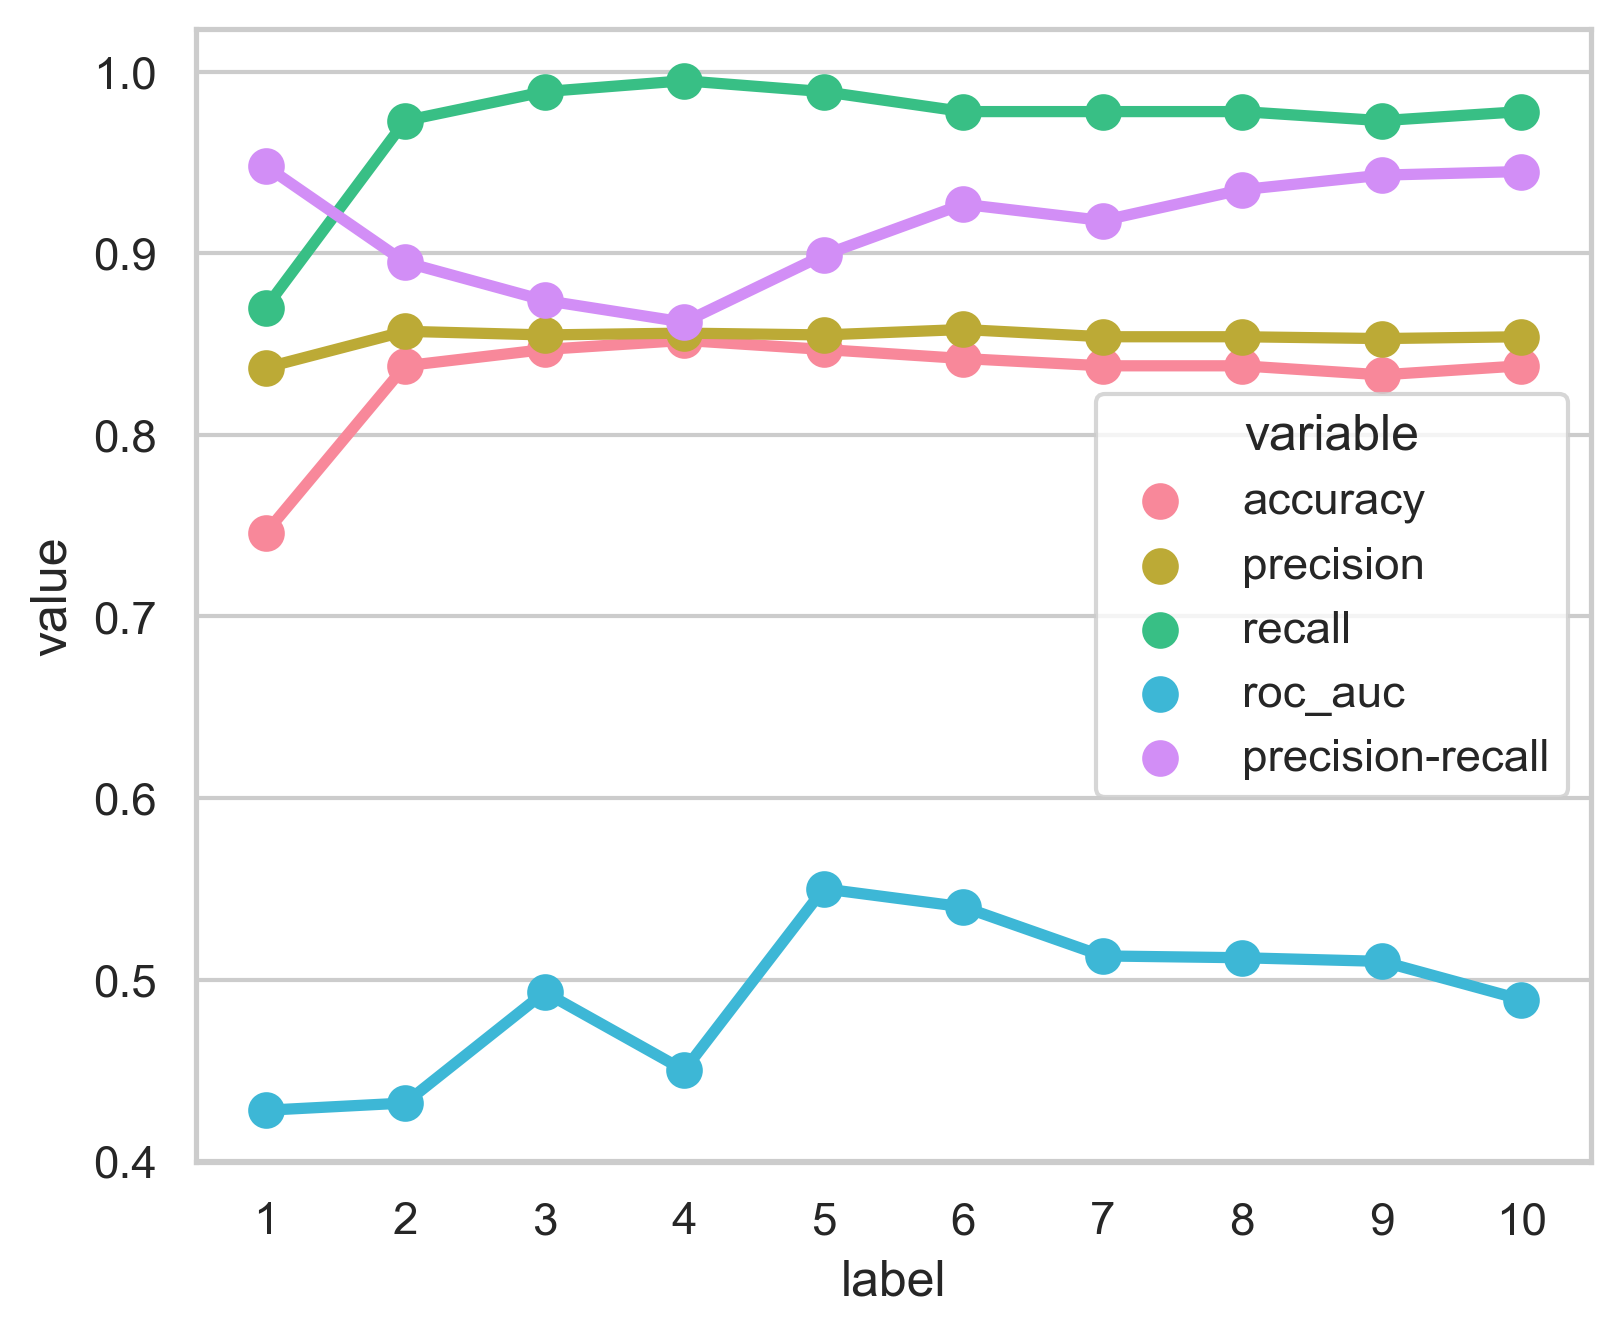

In [106]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 5),dpi=300)
sns.pointplot(x="label", y="value", hue="variable",
#             palette={"original": "#5681b9", "smote": "#dd4c65"},
#             markers=["^", "o"], linestyles=["-", "--"],
            data=df_tmp)

# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
plt.savefig("Fig\\1_原始数据_pca\\n=6选择依据.png",bbox_inches="tight")
# 答案基本上选6个

## 可视化
这里可视化在之后是为了，选择合适的PCA建模结果之后再可视化
###  kde可视化

这是第6维度PCA


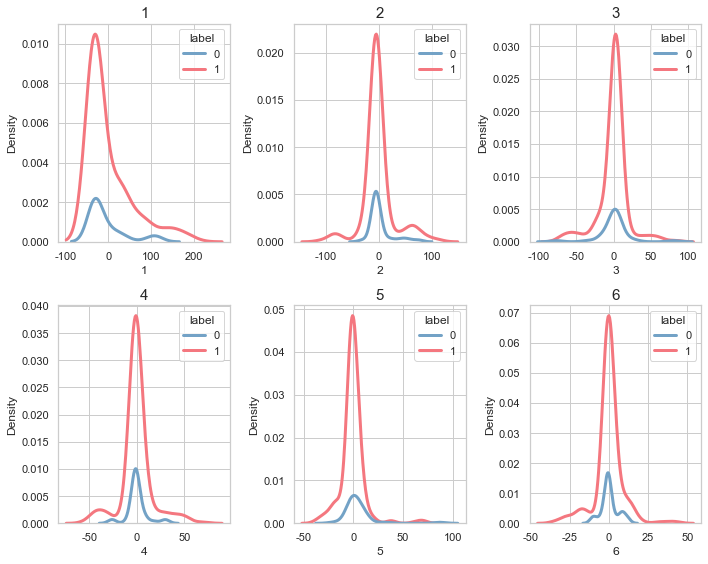

In [107]:
df = pd.read_csv("data_original_waited_for_model.csv")
x = df.iloc[:, :-1]  # 不要最后一列的数据
Y = df[["label"]]  # 提取标签
print(f"这是第{6}维度PCA")
pca = PCA(n_components=6, random_state=123)
x_tmp = pca.fit_transform(x)
x_tmp = pd.DataFrame(x_tmp,columns=range(1,7))
df_tmp = pd.concat([x_tmp,Y],axis=1)
fig = plt.figure(figsize=(10,8))
names = x_tmp.columns
for ii, name in enumerate(names):
    plt.subplot(2, 3, ii + 1)
    sns.kdeplot(data=df_tmp, x=name, hue="label", lw=3, bw=0.4)
    plt.title(name, fontsize=15)

plt.tight_layout()
plt.savefig("Fig\\1_原始数据_pca\\全分布.png",bbox_inches="tight")
plt.show()


这是第6维度PCA


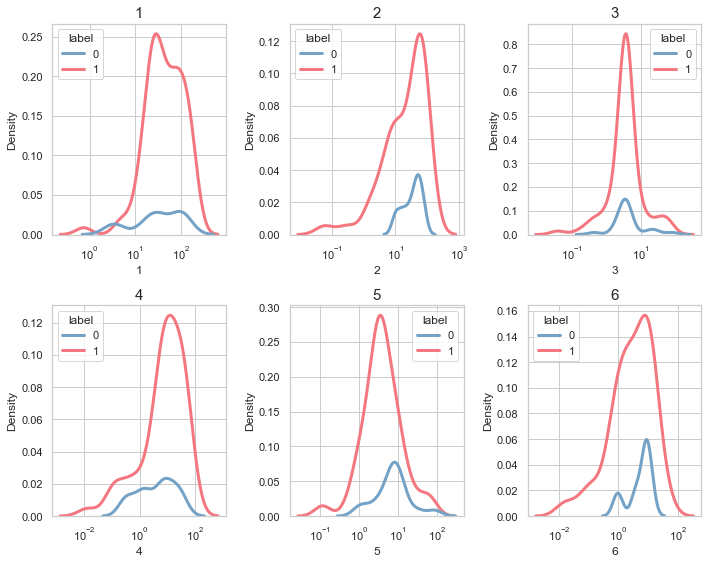

In [108]:
df = pd.read_csv("data_original_waited_for_model.csv")
x = df.iloc[:, :-1]  # 不要最后一列的数据
Y = df[["label"]]  # 提取标签
print(f"这是第{6}维度PCA")
pca = PCA(n_components=6, random_state=123)
x_tmp = pca.fit_transform(x)
x_tmp = pd.DataFrame(x_tmp,columns=range(1,7))
df_tmp = pd.concat([x_tmp,Y],axis=1)
fig = plt.figure(figsize=(10,8))
names = x_tmp.columns
for ii, name in enumerate(names):
    plt.subplot(2, 3, ii + 1)
    sns.kdeplot(data=df_tmp, x=name, hue="label", lw=3, bw=0.4, log_scale=True)
    plt.title(name, fontsize=15)

plt.tight_layout()
plt.savefig("Fig\\1_原始数据_pca\\log化全分布.png",bbox_inches="tight")
plt.show()

### 降维可视化

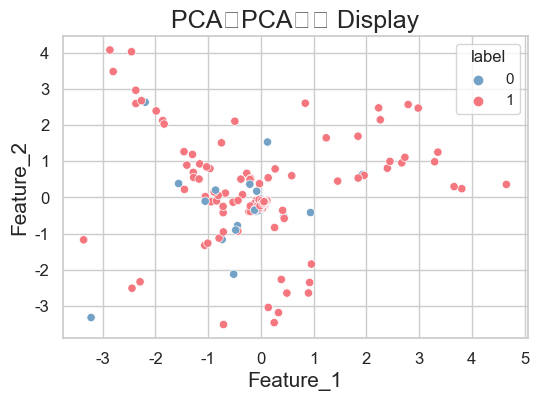

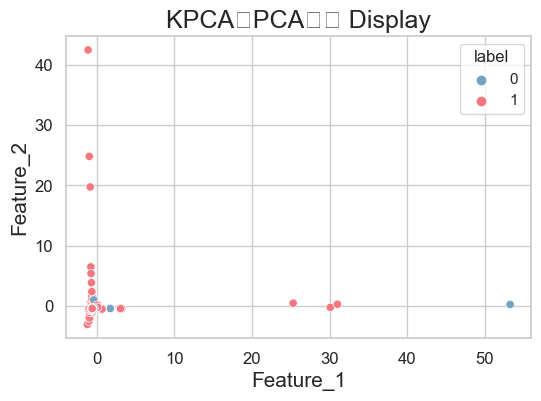

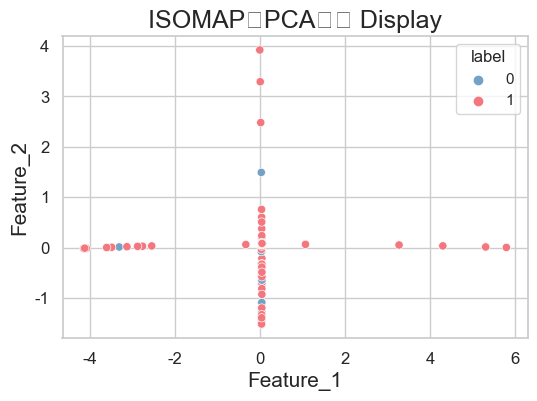

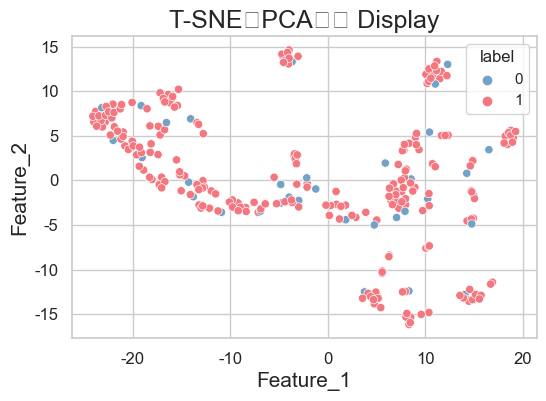

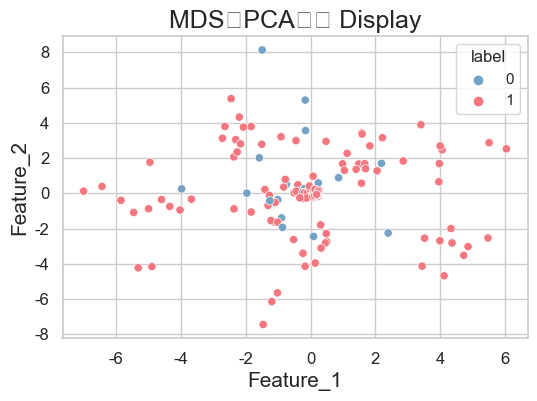

In [109]:
fig_names = ["PCA后PCA展示", "KPCA后PCA展示", "ISOMAP后PCA展示", "T-SNE后PCA展示", "MDS后PCA展示"]
location = "Fig\\1_原始数据_pca\\"
data_enhance_display(x_tmp,Y, fig_names,location)

## Pvalue比较

1,,,,,KstestResult(statistic=0.14119214119214119, pvalue=0.4714063955847605)
2,,,,,KstestResult(statistic=0.13086913086913088, pvalue=0.5679718771301696)
3,,,,,KstestResult(statistic=0.12121212121212122, pvalue=0.6626575921953571)
4,,,,,KstestResult(statistic=0.0919080919080919, pvalue=0.9133373259463751)
5,,,,,KstestResult(statistic=0.2937062937062937, pvalue=0.004775982019631364)
6,,,,,KstestResult(statistic=0.18514818514818515, pvalue=0.1768211070385266)
[5]
1


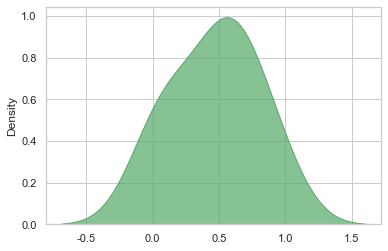

In [110]:
x_tmp = pd.DataFrame(x_tmp,columns=range(1,7))
df_original_pca,original_fig_pca = pvalue(df_tmp,x_tmp)

## 热图比较

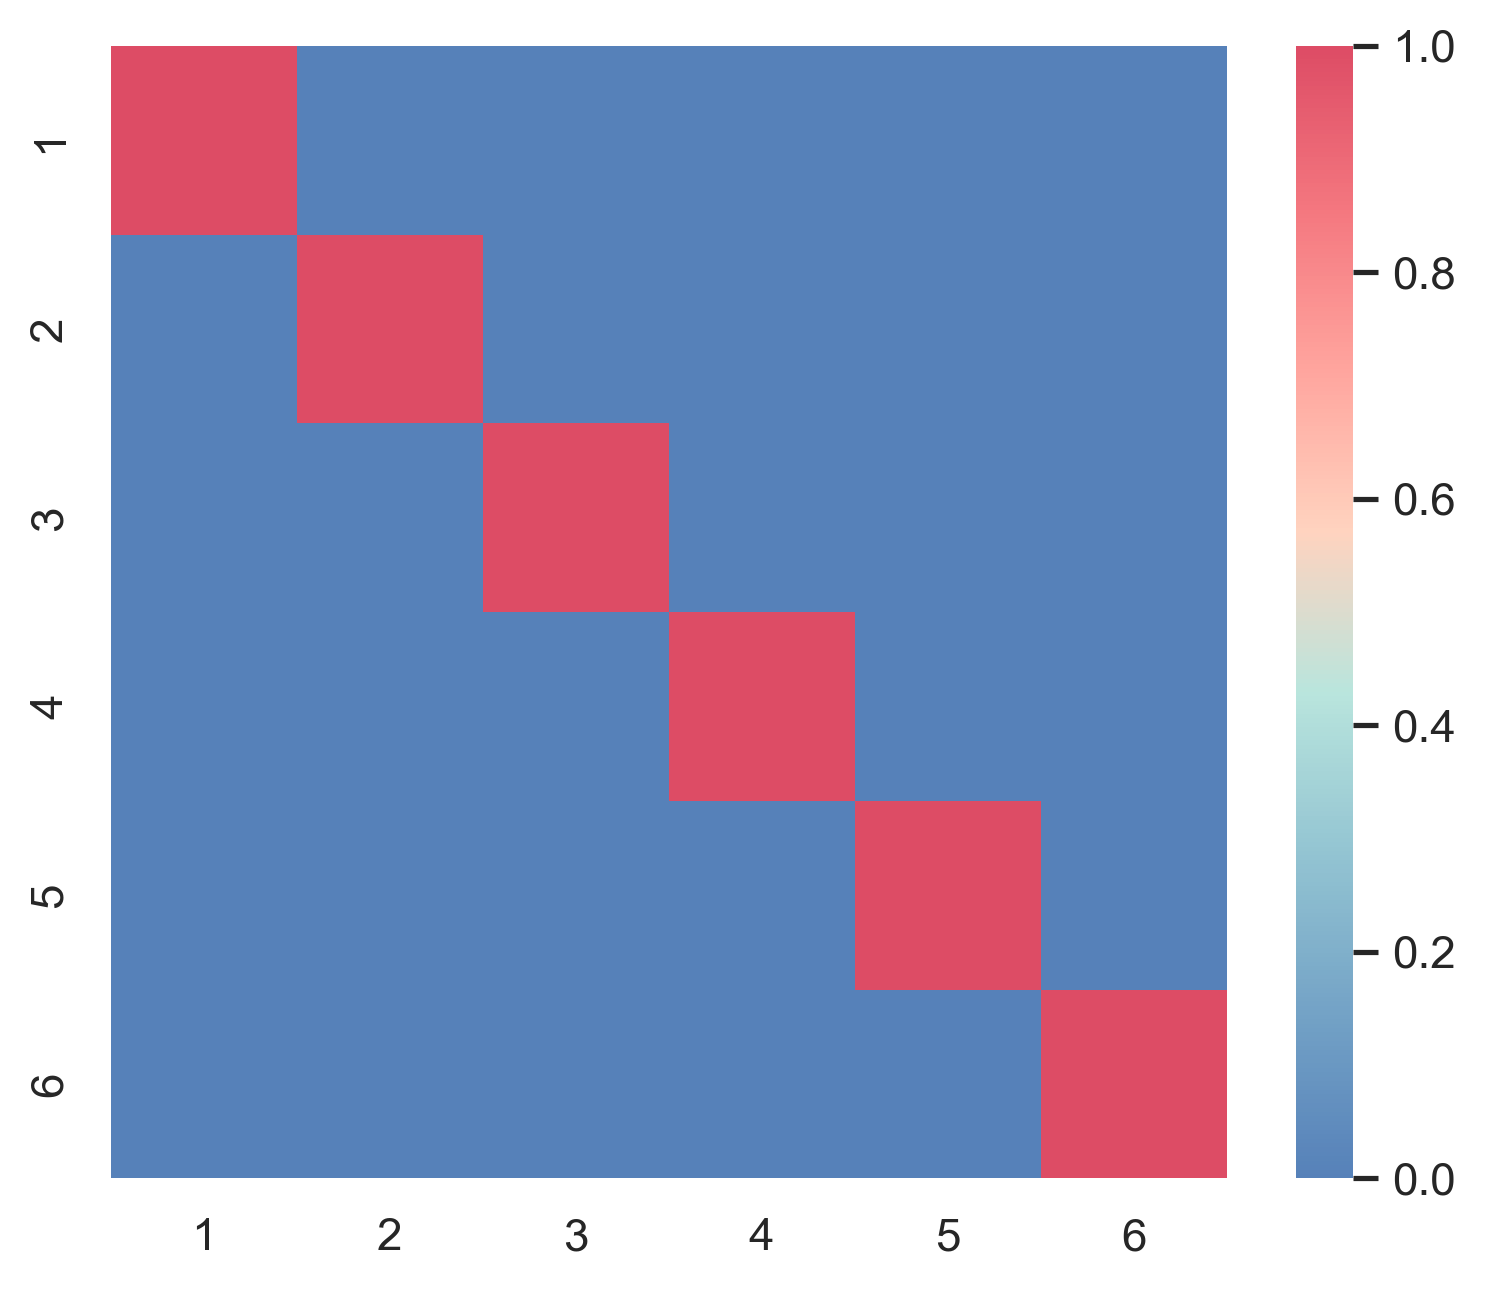

In [111]:
location = "Fig\\1_原始数据_pca\\热图.png"
heatmap_3 = heatmap_fig(x_tmp,location)

## 建模比较

In [112]:
X_train, X_test, y_train, y_test = train_test_split(
    x_tmp, Y, test_size=0.2, random_state=0, stratify=df["label"], shuffle=True   # y_imbalance 是 label的那一列
)
scores = cv_score(X_train, y_train, random_state=42)
pred_score = predict_mean_score(scores, X_test)
average_precision = average_precision_score(y_test, pred_score[:, 1])
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Mean Accuracy: 0.842
Mean Precision: 0.858
Mean Recall: 0.978
Mean ROC AUC: 0.54
Average precision-recall score: 0.93


In [113]:
# 我来做一个记录模块，但是记录结果
df_original_pca = pd.DataFrame({
    "Accuracy": [round_score(scores['test_accuracy'].mean())],
    "Precision": [round_score(scores['test_precision'].mean())],
    "Recall": [round_score(scores['test_recall'].mean())],
    "ROC AUC": [round_score(scores['test_roc_auc'].mean())]
})
df_original_pca

Accuracy  Precision  Recall  ROC AUC
0     0.842      0.858   0.978     0.54

In [114]:
tmp_pca = df_original_pca.T
tmp_pca.columns = ['original_pca']
tmp_pca

original_pca
Accuracy          0.842
Precision         0.858
Recall            0.978
ROC AUC           0.540

# 增强数据
## 可视化
### kde可视化

In [115]:
smote = SMOTE(random_state=123, k_neighbors=3)
x_smote, y_smote = smote.fit_resample(x,Y)
df_smote = pd.concat([x_smote,y_smote],axis=1)
df_smote.to_csv("2_data_deal_smote.csv",index=False)
print("SMOTE : ",np.unique(y_smote,return_counts = True))

SMOTE :  (array([0, 1], dtype=int64), array([231, 231], dtype=int64))


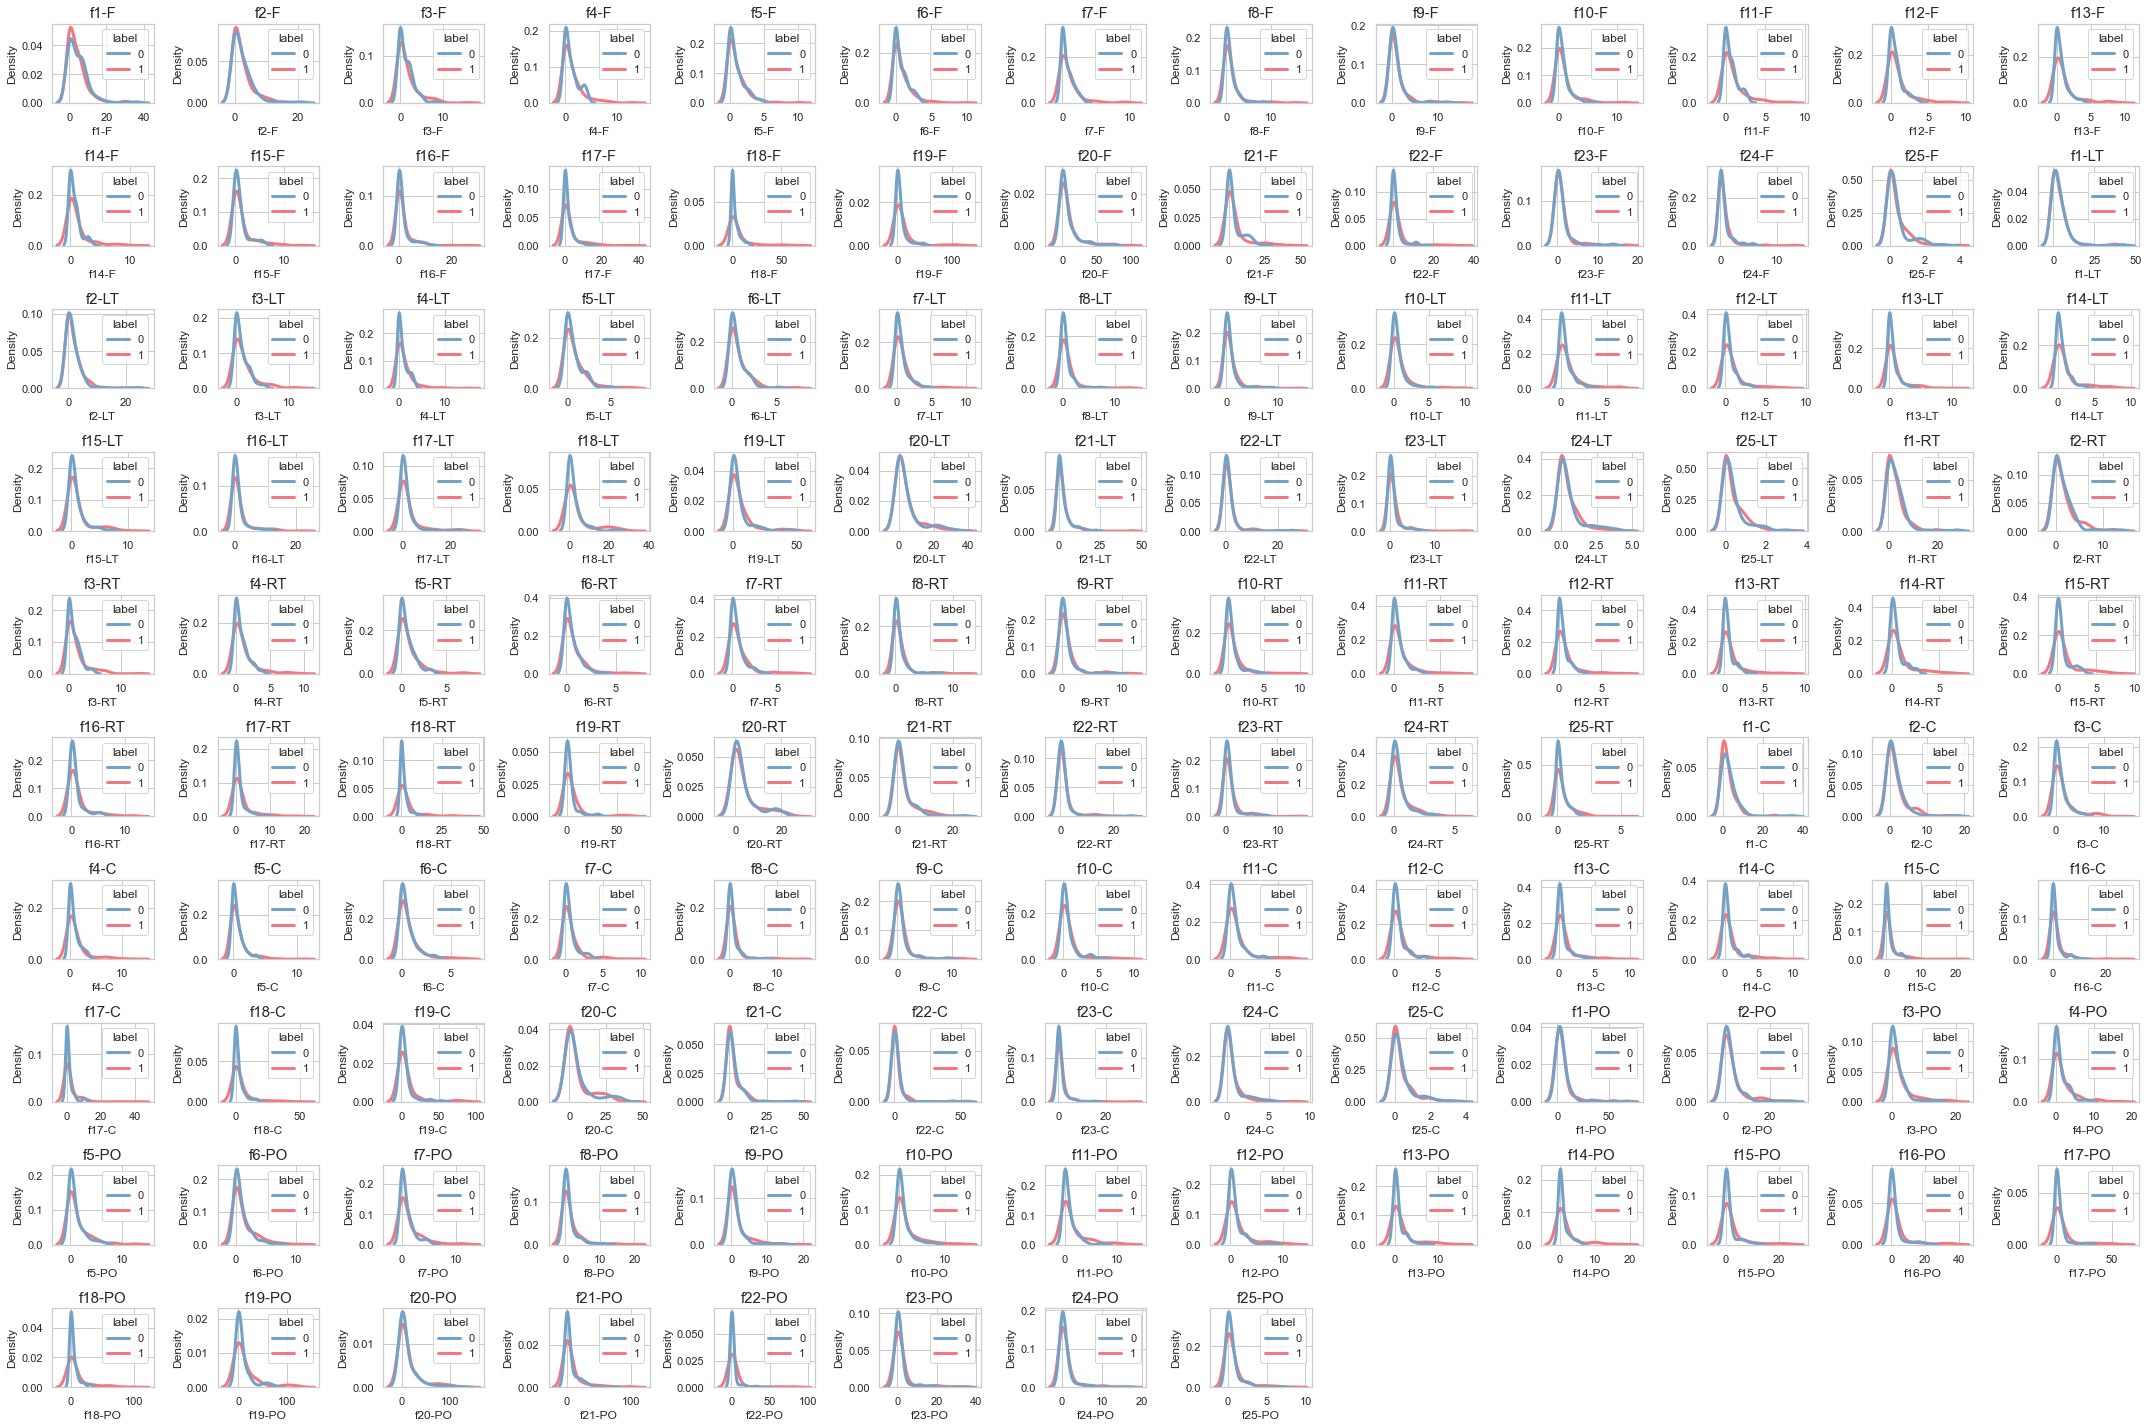

In [116]:
df_smote = pd.read_csv("2_data_deal_smote.csv")
fig = plt.figure(figsize=(30,20))

names = x_smote.columns
for ii, name in enumerate(names):
    plt.subplot(10, 13, ii + 1)
    sns.kdeplot(data=df_smote, x=name, hue="label", lw=3, bw=0.4)
    plt.title(name, fontsize=15)

plt.tight_layout()
plt.savefig("Fig\\2_增强数据\\全分布.png",bbox_inches="tight")
plt.show()

### 降维可视化

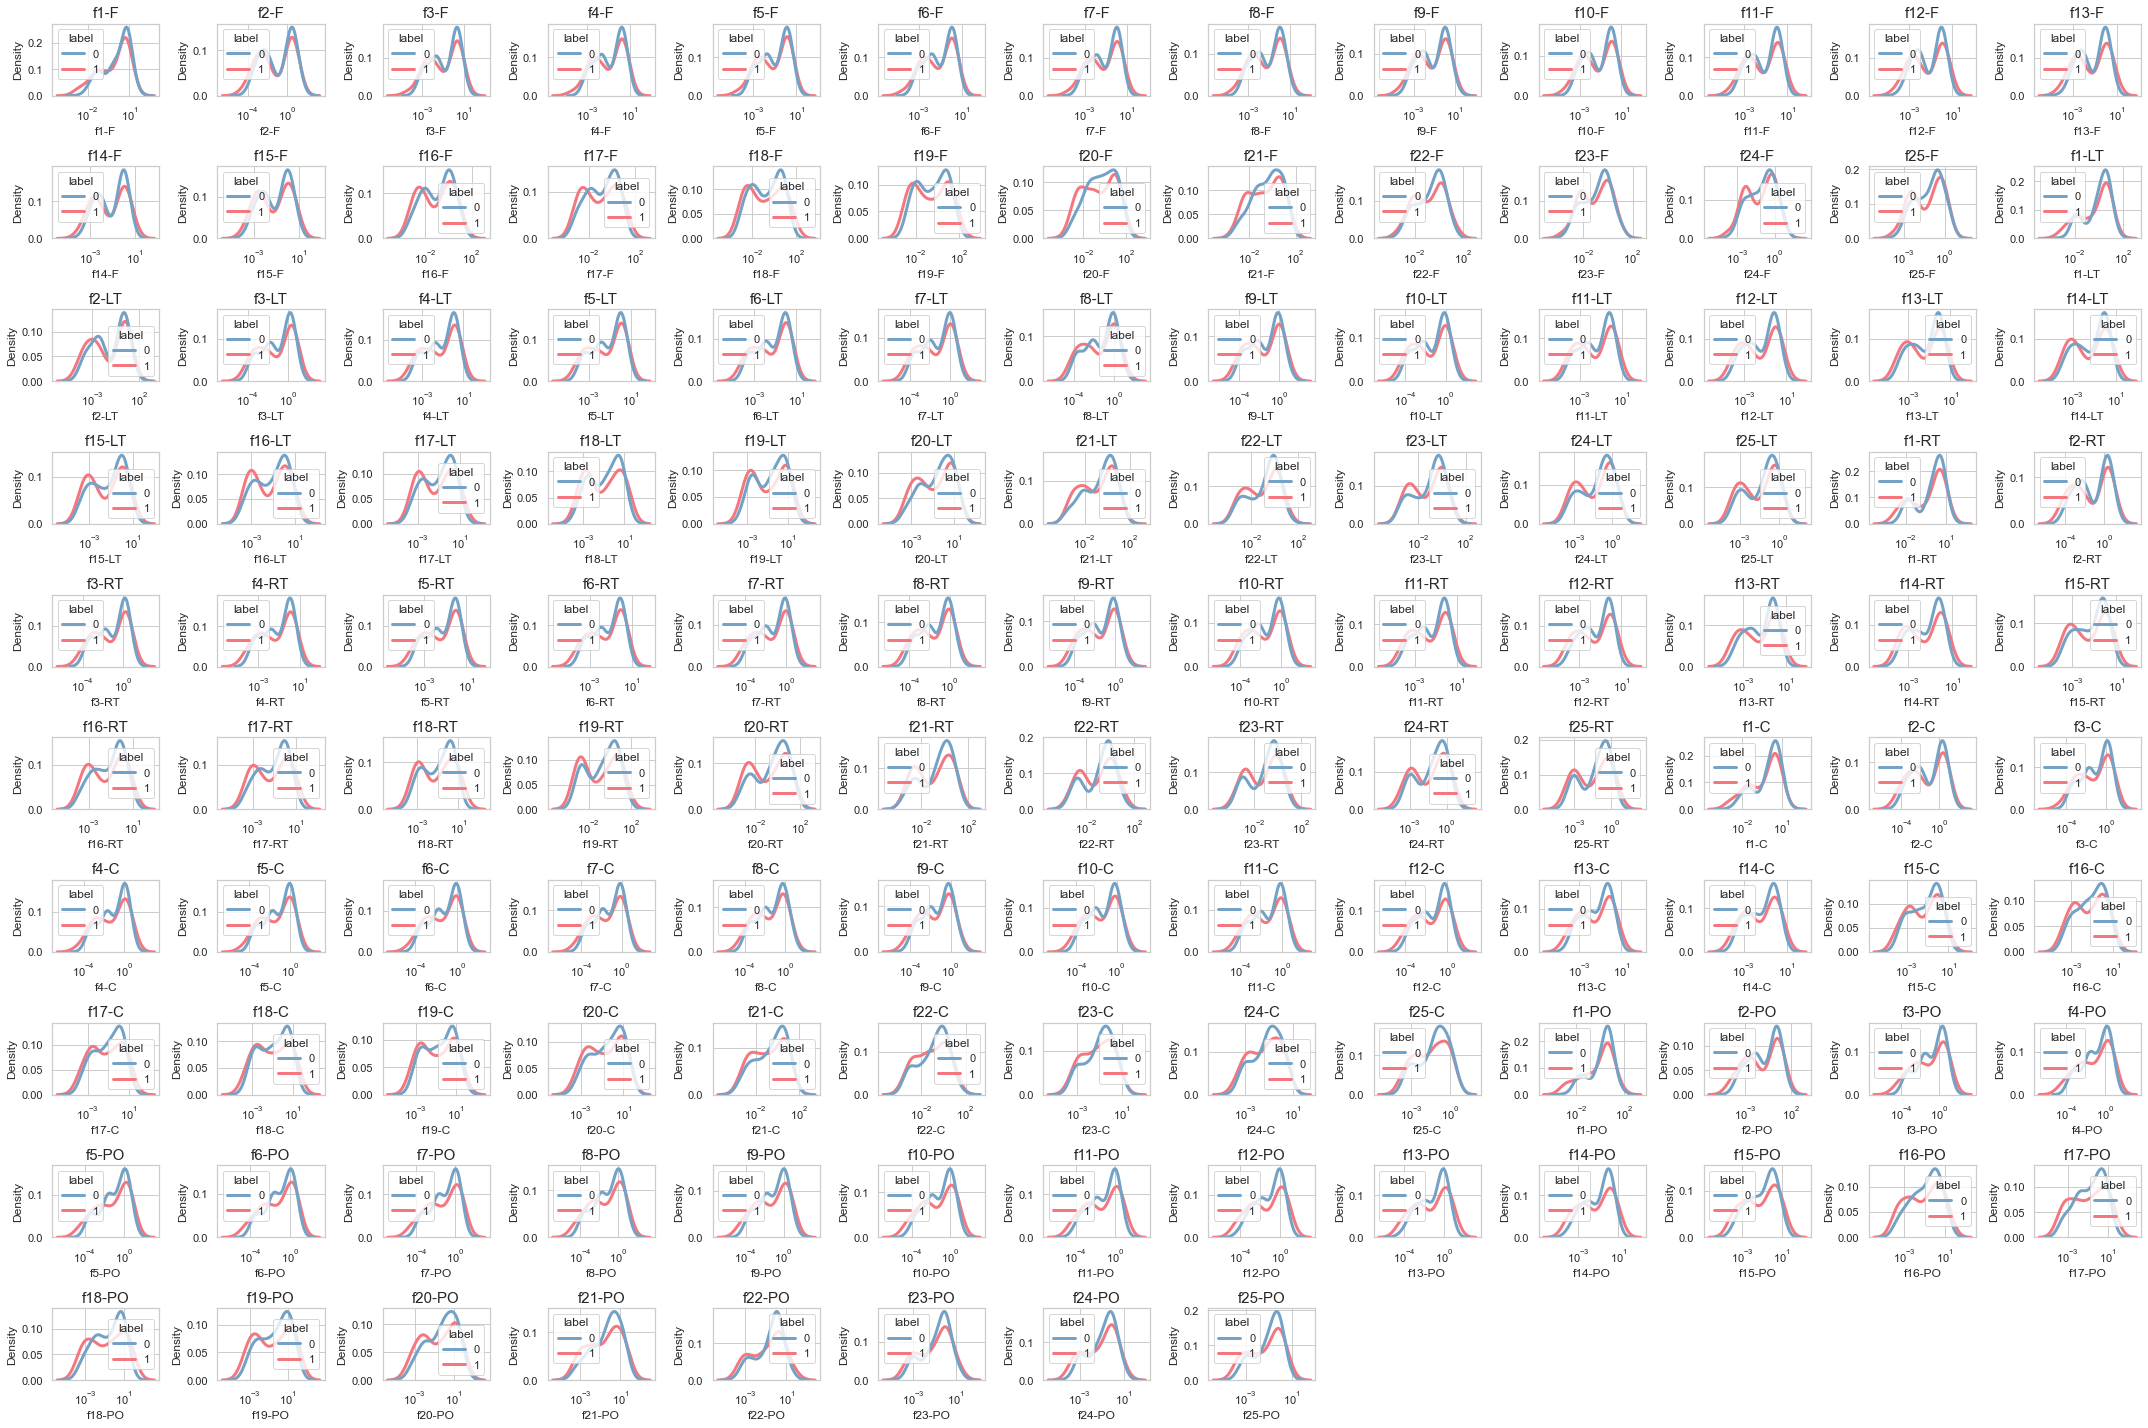

In [117]:
df_smote = pd.read_csv("2_data_deal_smote.csv")
fig = plt.figure(figsize=(30,20))

names = x_smote.columns
for ii, name in enumerate(names):
    plt.subplot(10, 13, ii + 1)
    sns.kdeplot(data=df_smote, x=name, hue="label", lw=3, bw=0.4, log_scale=True)
    plt.title(name, fontsize=15)

plt.tight_layout()
plt.savefig("Fig\\2_增强数据\\增强后log化全分布图.png",bbox_inches="tight")
plt.show()


## 降维可视化

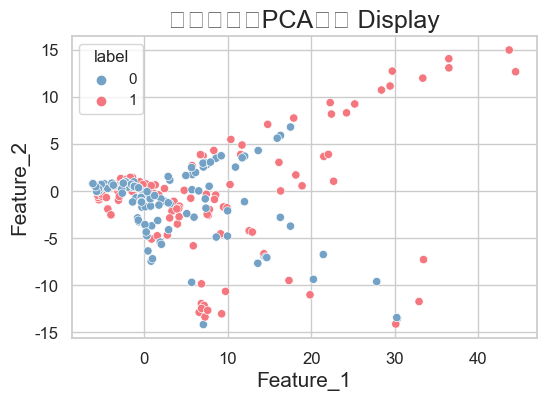

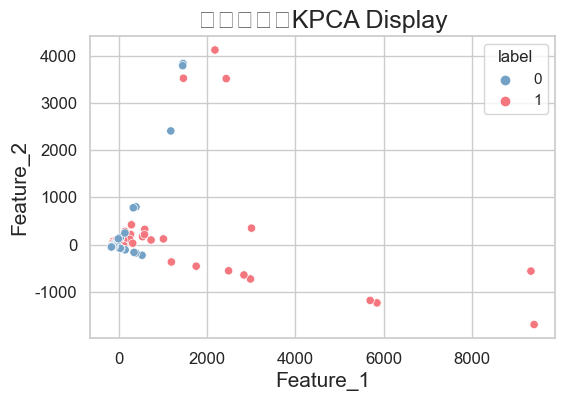

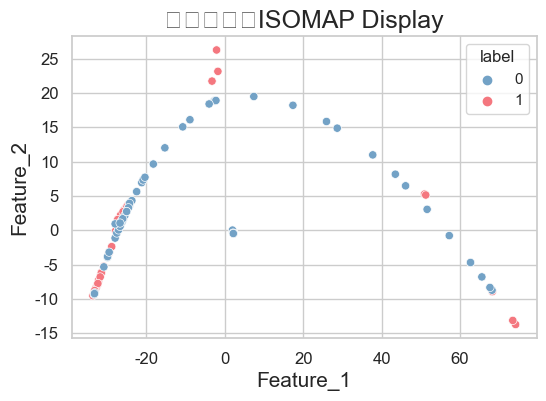

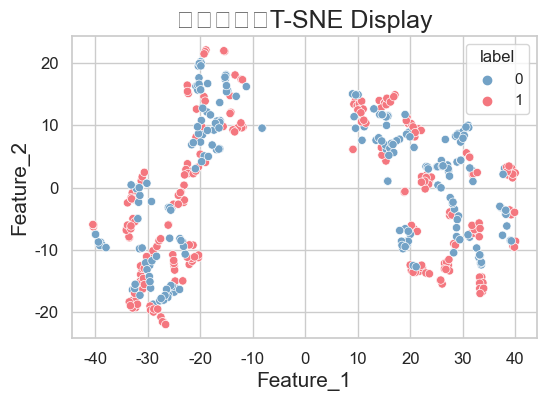

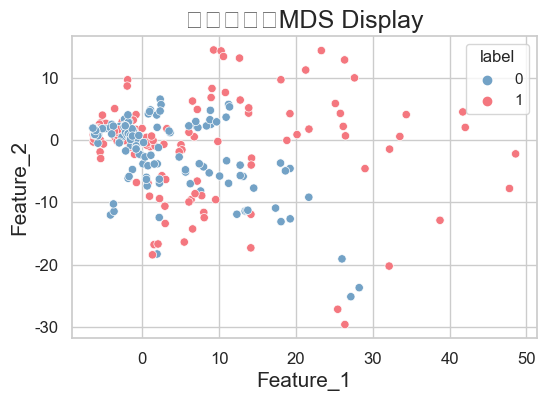

In [118]:
fig_names = ["增强数据后PCA展示", "增强数据后KPCA", "增强数据后ISOMAP", "增强数据后T-SNE", "增强数据后MDS"]
location = "Fig\\2_增强数据\\"
data_enhance_display(x_smote, y_smote, fig_names,location)

## P-value

f1-F,,,,,KstestResult(statistic=0.18048618048618048, pvalue=0.1989808059635899)
f2-F,,,,,KstestResult(statistic=0.15018315018315018, pvalue=0.395551865095895)
f3-F,,,,,KstestResult(statistic=0.15451215451215453, pvalue=0.3616800832048548)
f4-F,,,,,KstestResult(statistic=0.15417915417915418, pvalue=0.364118192620453)
f5-F,,,,,KstestResult(statistic=0.14985014985014986, pvalue=0.39809213291666157)
f6-F,,,,,KstestResult(statistic=0.14985014985014986, pvalue=0.39809213291666157)
f7-F,,,,,KstestResult(statistic=0.15018315018315018, pvalue=0.395551865095895)
f8-F,,,,,KstestResult(statistic=0.15884115884115885, pvalue=0.3297218800956546)
f9-F,,,,,KstestResult(statistic=0.14552114552114553, pvalue=0.4338947004526912)
f10-F,,,,,KstestResult(statistic=0.16716616716616717, pvalue=0.2737527794107313)
f11-F,,,,,KstestResult(statistic=0.17582417582417584, pvalue=0.2231826795002836)
f12-F,,,,,KstestResult(statistic=0.19314019314019315, pvalue=0.14359992233012842)
f13-F,,,,,KstestResult(statistic=0.15

f20-PO,,,,,KstestResult(statistic=0.13353313353313354, pvalue=0.5424261802382988)
f21-PO,,,,,KstestResult(statistic=0.13786213786213786, pvalue=0.502186191542284)
f22-PO,,,,,KstestResult(statistic=0.13786213786213786, pvalue=0.502186191542284)
f23-PO,,,,,KstestResult(statistic=0.11921411921411922, pvalue=0.6796833284484975)
f24-PO,,,,,KstestResult(statistic=0.13719613719613719, pvalue=0.5076902938639565)
f25-PO,,,,,KstestResult(statistic=0.14185814185814186, pvalue=0.46599879895337226)
[]
0


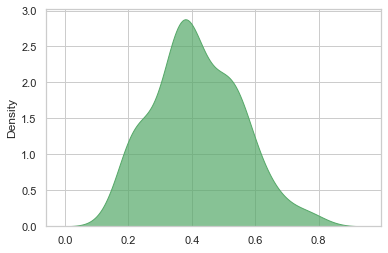

In [119]:
df_steer,steer_fig = pvalue(df_smote,x_smote)

## 热图

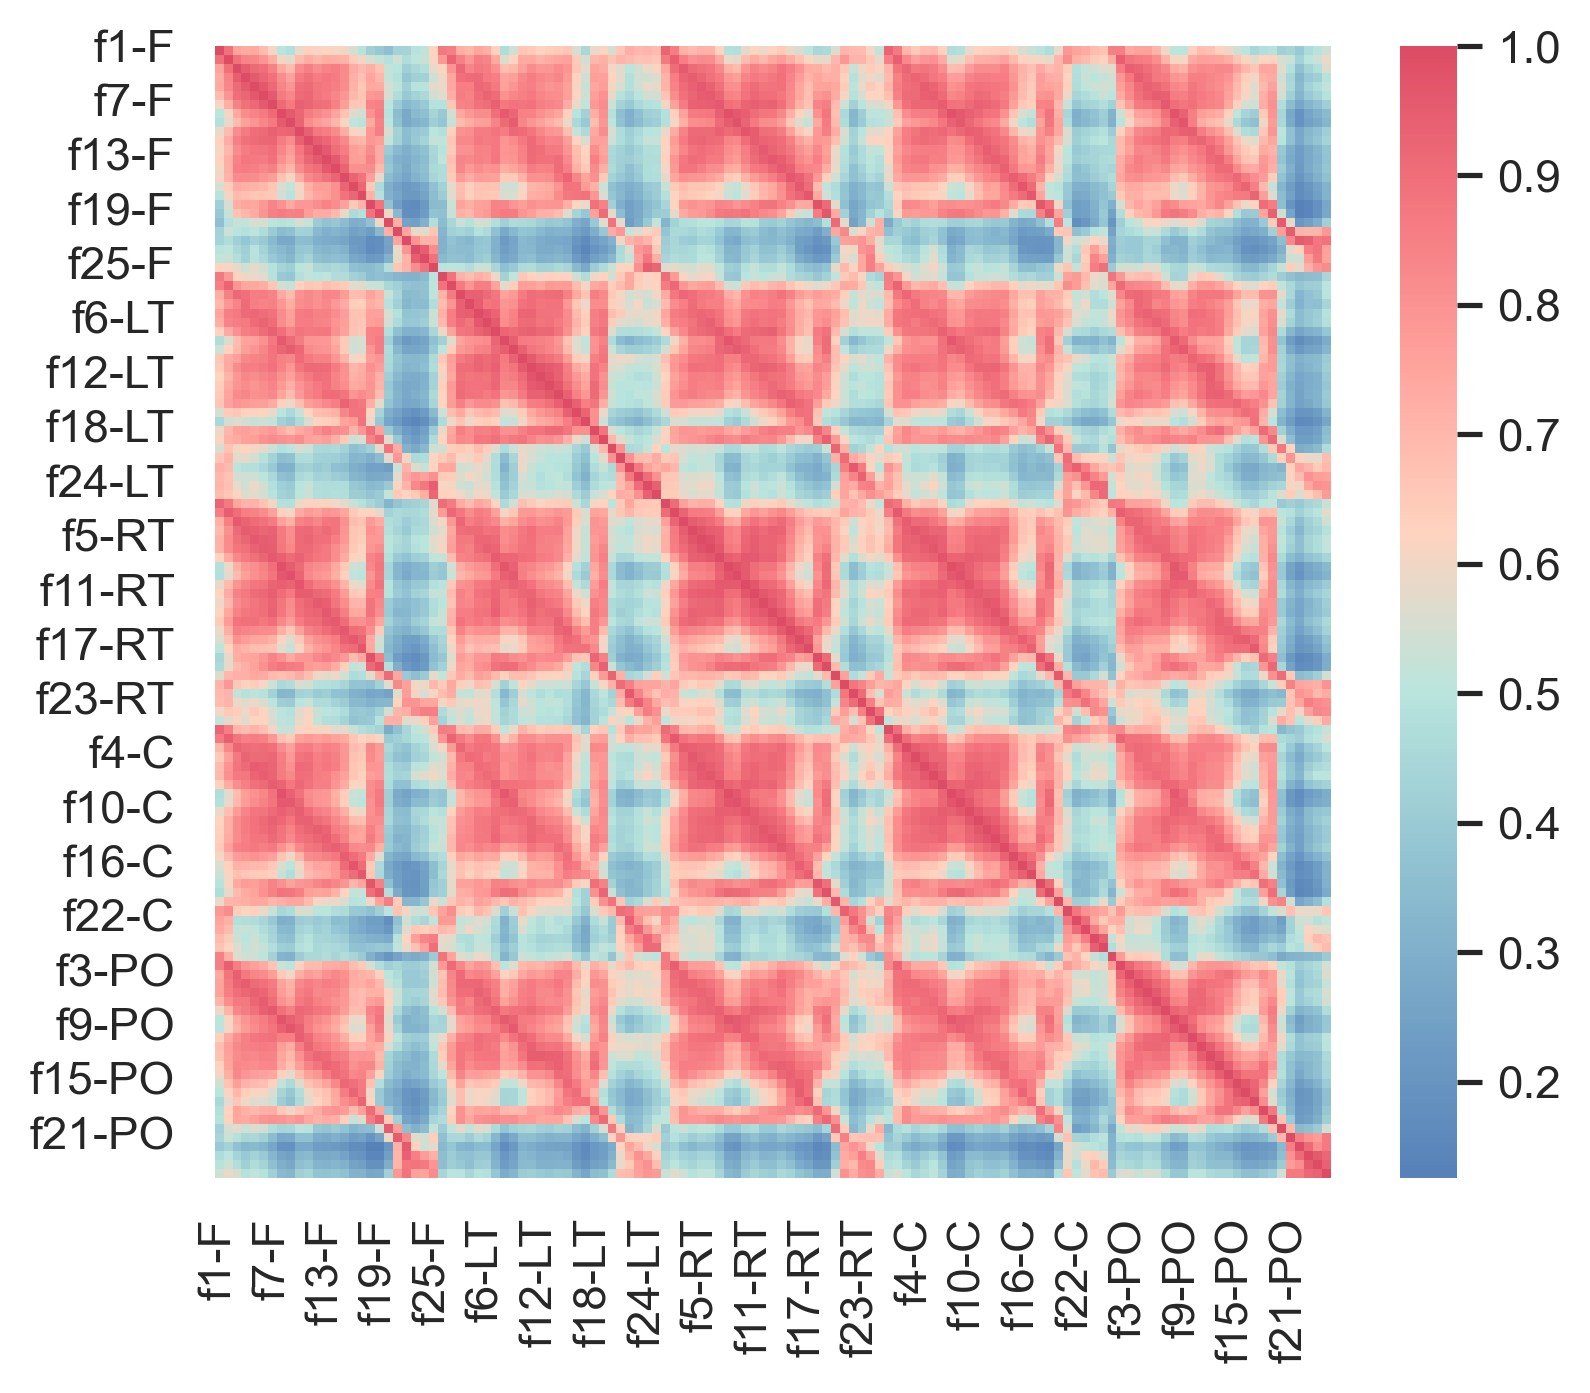

In [120]:
location = "Fig\\2_增强数据\\热图.png"
heatmap_4 = heatmap_fig(x_smote,location)

## 建模比较

In [121]:
X_train, X_test, y_train, y_test = train_test_split(
   x_smote, y_smote, test_size=0.2, random_state=0, stratify=y_smote['label'], shuffle=True   # y_imbalance 是 label的那一列
)
scores = cv_score(X_train, y_train, random_state=42)
pred_score = predict_mean_score(scores, X_test)
average_precision = average_precision_score(y_test, pred_score[:, 1])
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Mean Accuracy: 0.819
Mean Precision: 0.841
Mean Recall: 0.784
Mean ROC AUC: 0.911
Average precision-recall score: 0.95


In [122]:
# 我来做一个记录模块，但是记录结果
df_steer = pd.DataFrame({
    "Accuracy": [round_score(scores['test_accuracy'].mean())],
    "Precision": [round_score(scores['test_precision'].mean())],
    "Recall": [round_score(scores['test_recall'].mean())],
    "ROC AUC": [round_score(scores['test_roc_auc'].mean())]
})
df_steer
tmp_steer = df_steer.T
tmp_steer.columns = ['steer']
tmp_steer

steer
Accuracy   0.819
Precision  0.841
Recall     0.784
ROC AUC    0.911

# 数据增强PCA
## 降维
### 降维的损失研究

这是第10维度PCA


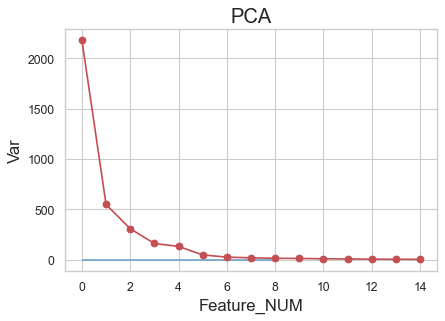

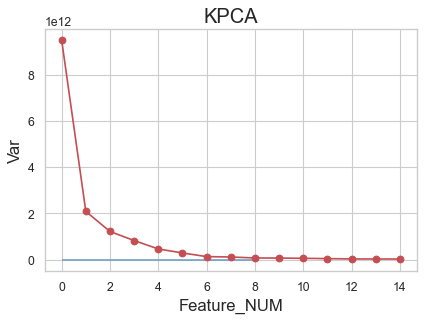

In [123]:
df = pd.read_csv("2_data_deal_smote.csv")
x = df.iloc[:, :-1]  # 不要最后一列的数据
Y = df[["label"]]  # 提取标签
print(f"这是第{10}维度PCA")

fig_names = ["PCA","KPCA"]

pca = PCA(n_components = 15,random_state = 123)
kpca = KernelPCA(n_components = 15,kernel = "poly", ## 核函数为rbf核
             gamma = 0.2,random_state = 123)
model_estimators = [pca,kpca]
for (name, method) in zip(fig_names, model_estimators): #五种循环的方法
    method.fit(x)

    if name == "PCA":
        exvar = method.explained_variance_
    if name =="KPCA":
        exvar = method.lambdas_

    plt.figure(dpi= 80)       #figsize=()
    plt.plot(exvar,"r-o") 
    plt.hlines(y = 1, xmin = 0, xmax = 8)
    plt.xlabel("Feature_NUM",fontsize=15)
    plt.ylabel("Var",fontsize=15)
    plt.title(name, fontsize=18)
    plt.savefig("Fig\\3_增强数据_pca\\"+name+"损失函数.png",bbox_inches="tight")
    plt.show()

In [124]:
score_funcs = [
        'accuracy',
        'precision',
        'recall',
        'roc_auc',
        "precision-recall"]
tmp = np.zeros((12,5))
df_scores = pd.DataFrame(tmp,index=range(1,13),columns=score_funcs)   #  这样得到一个十轮的函数

for i in range(1, 13):
    df = pd.read_csv("data_original_waited_for_model.csv")
    x = x_smote  # 不要最后一列的数据
    Y = y_smote  # 提取标签
    print(f"这是第{i}维度PCA")
    pca = PCA(n_components=i, random_state=123)
    x_tmp = pca.fit_transform(x)
    X_train, X_test, y_train, y_test = train_test_split(
        x_tmp,
        Y,
        test_size=0.2,
        random_state=0,
        stratify=Y,
        shuffle=True  # y_imbalance 是 label的那一列
    )
    scores = cv_score(X_train, y_train, random_state=42)
    
    # 开始给df 
    for name in score_funcs:
        if name != "precision-recall":
            df_scores[name].iloc[i-1] = round_score(scores["test_"+name].mean())
        else:
            pred_score = predict_mean_score(scores, X_test)
            average_precision = average_precision_score(y_test, pred_score[:, 1])
            print('Average precision-recall score: {0:0.2f}'.format(average_precision))
            df_scores["precision-recall"].iloc[i-1]=round_score(average_precision)

df_scores

这是第1维度PCA
Mean Accuracy: 0.612
Mean Precision: 0.625
Mean Recall: 0.578
Mean ROC AUC: 0.652
Average precision-recall score: 0.62
这是第2维度PCA
Mean Accuracy: 0.653
Mean Precision: 0.657
Mean Recall: 0.649
Mean ROC AUC: 0.724
Average precision-recall score: 0.88
这是第3维度PCA
Mean Accuracy: 0.71
Mean Precision: 0.717
Mean Recall: 0.708
Mean ROC AUC: 0.803
Average precision-recall score: 0.89
这是第4维度PCA
Mean Accuracy: 0.718
Mean Precision: 0.747
Mean Recall: 0.676
Mean ROC AUC: 0.801
Average precision-recall score: 0.87
这是第5维度PCA
Mean Accuracy: 0.74
Mean Precision: 0.762
Mean Recall: 0.719
Mean ROC AUC: 0.826
Average precision-recall score: 0.90
这是第6维度PCA
Mean Accuracy: 0.77
Mean Precision: 0.795
Mean Recall: 0.746
Mean ROC AUC: 0.859
Average precision-recall score: 0.90
这是第7维度PCA
Mean Accuracy: 0.764
Mean Precision: 0.785
Mean Recall: 0.746
Mean ROC AUC: 0.851
Average precision-recall score: 0.90
这是第8维度PCA
Mean Accuracy: 0.773
Mean Precision: 0.804
Mean Recall: 0.746
Mean ROC AUC: 0.864
Average 

accuracy  precision  recall  roc_auc  precision-recall
1      0.612      0.625   0.578    0.652             0.619
2      0.653      0.657   0.649    0.724             0.883
3      0.710      0.717   0.708    0.803             0.893
4      0.718      0.747   0.676    0.801             0.874
5      0.740      0.762   0.719    0.826             0.897
6      0.770      0.795   0.746    0.859             0.900
7      0.764      0.785   0.746    0.851             0.898
8      0.773      0.804   0.746    0.864             0.913
9      0.797      0.810   0.784    0.891             0.906
10     0.808      0.809   0.811    0.897             0.926
11     0.810      0.812   0.811    0.895             0.938
12     0.816      0.816   0.822    0.897             0.935

In [125]:
df_scores["label"]=1
for i in range(1,13):
    df_scores["label"].iloc[i-1] = i

df_tmp = df_scores.melt(id_vars="label")
df_tmp

label          variable  value
0       1          accuracy  0.612
1       2          accuracy  0.653
2       3          accuracy  0.710
3       4          accuracy  0.718
4       5          accuracy  0.740
5       6          accuracy  0.770
6       7          accuracy  0.764
7       8          accuracy  0.773
8       9          accuracy  0.797
9      10          accuracy  0.808
10     11          accuracy  0.810
11     12          accuracy  0.816
12      1         precision  0.625
13      2         precision  0.657
14      3         precision  0.717
15      4         precision  0.747
16      5         precision  0.762
17      6         precision  0.795
18      7         precision  0.785
19      8         precision  0.804
20      9         precision  0.810
21     10         precision  0.809
22     11         precision  0.812
23     12         precision  0.816
24      1            recall  0.578
25      2            recall  0.649
26      3            recall  0.708
27      4            recall  0.676
28      5            recall  0.719
29      6            recall  0.746
30      7            recall  0.746
31      8            recall  0.746
32      9            recall  0.784
33     10            recall  0.811
34     11            recall  0.811
35     12            recall  0.822
36      1           roc_auc  0.652
37      2           roc_auc  0.724
38      3           roc_auc  0.803
39      4           roc_auc  0.801
40      5           roc_auc  0.826
41      6           roc_auc  0.859
42      7           roc_auc  0.851
43      8           roc_auc  0.864
44      9           roc_auc  0.891
45     10           roc_auc  0.897
46     11           roc_auc  0.895
47     12           roc_auc  0.897
48      1  precision-recall  0.619
49      2  precision-recall  0.883
50      3  precision-recall  0.893
51      4  precision-recall  0.874
52      5  precision-recall  0.897
53      6  precision-recall  0.900
54      7  precision-recall  0.898
55      8  precision-recall  0.913
56      9  precision-recall  0.906
57     10  precision-recall  0.926
58     11  precision-recall  0.938
59     12  precision-recall  0.935

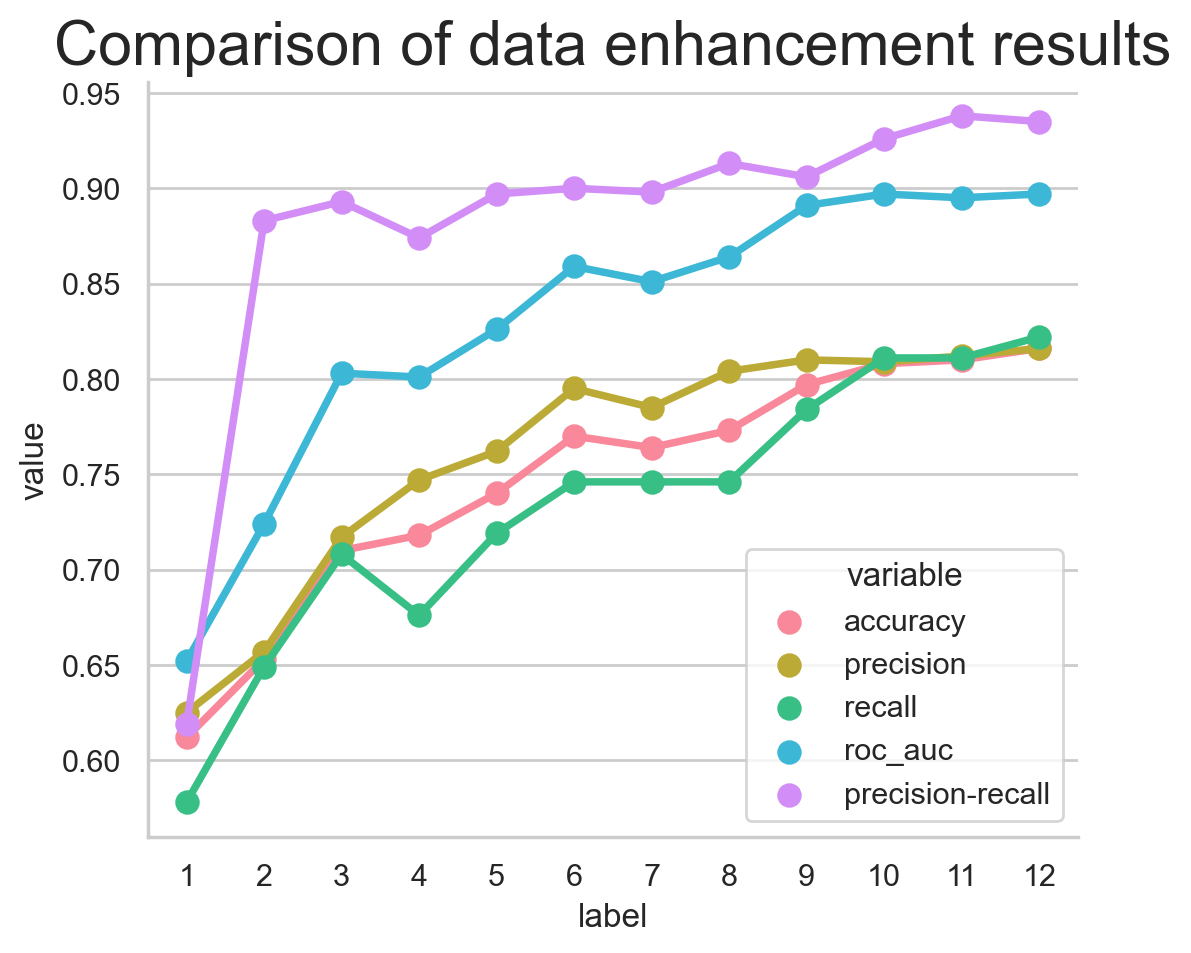

In [126]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 5),dpi=200)
ax1 = fig.add_subplot(1, 1, 1);ax1.set_title("Comparison of data enhancement results",fontsize=22)

sns.pointplot(x="label", y="value", hue="variable",
#             palette={"original": "#5681b9", "smote": "#dd4c65"},
#             markers=["^", "o"], linestyles=["-", "--"],
            data=df_tmp)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.savefig("Fig\\3_增强数据_pca\\n=10选择依据.png",bbox_inches="tight")
# 答案基本上选10个

### 降维可视化

这是第10维度PCA


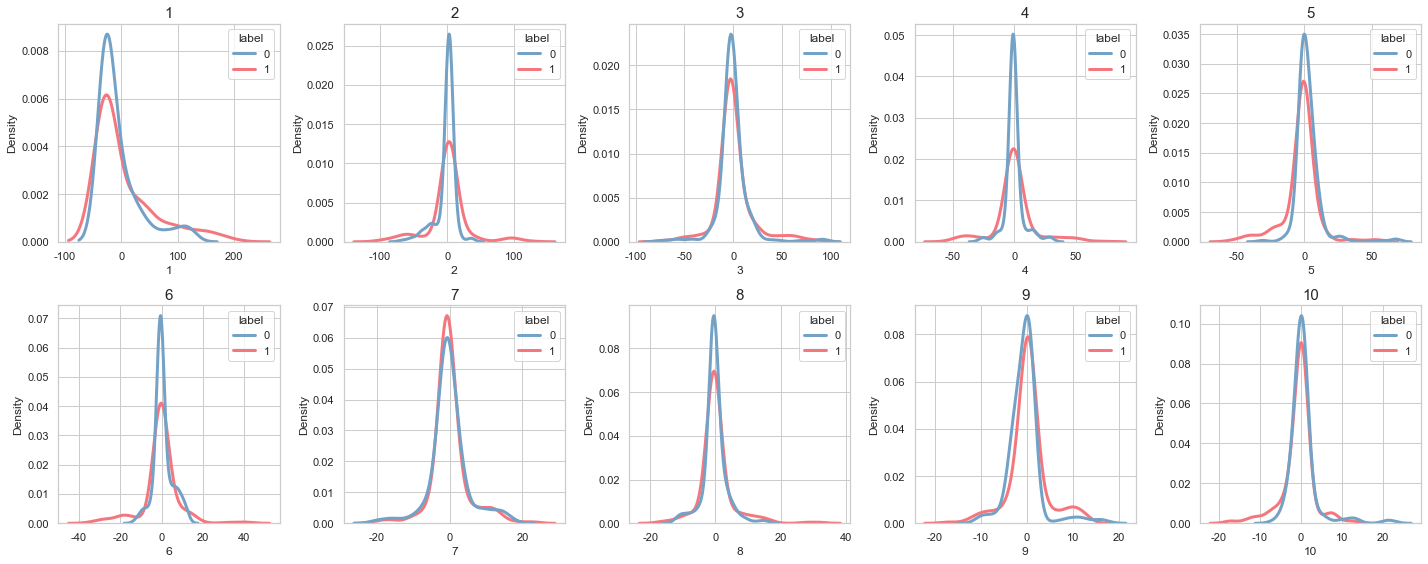

In [127]:
df = pd.read_csv("2_data_deal_smote.csv")
x = df.iloc[:, :-1]  # 不要最后一列的数据
Y = df[["label"]]  # 提取标签
print(f"这是第{10}维度PCA")
pca = PCA(n_components=10, random_state=123)
x_tmp = pca.fit_transform(x)
x_tmp = pd.DataFrame(x_tmp,columns=range(1,11))
df_tmp = pd.concat([x_tmp,Y],axis=1)
df_tmp.to_csv("data_smote_pca_10.csv",index=False)
fig = plt.figure(figsize=(20,8))
names = x_tmp.columns
for ii, name in enumerate(names):
    plt.subplot(2, 5, ii + 1)
    sns.kdeplot(data=df_tmp, x=name, hue="label", lw=3, bw=0.4)
    plt.title(name, fontsize=15)

plt.tight_layout()
plt.savefig("Fig\\3_增强数据_pca\\全分布.png",bbox_inches="tight")
plt.show()


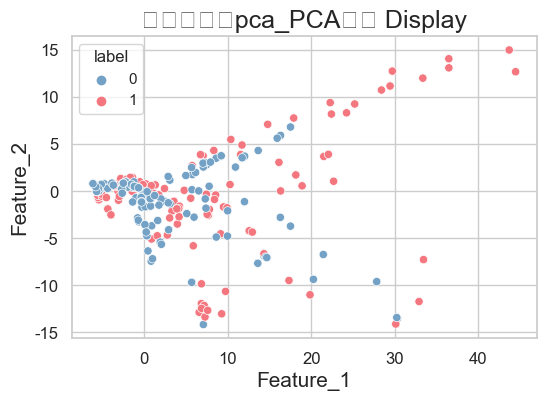

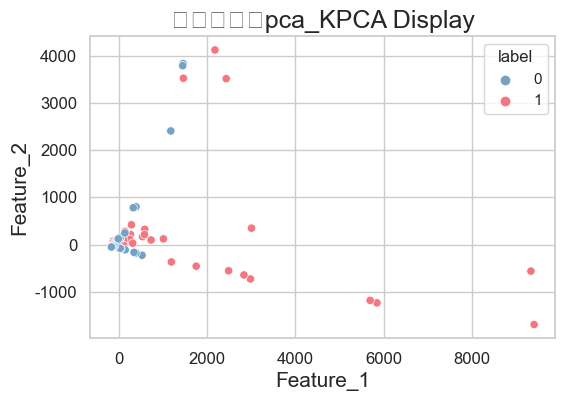

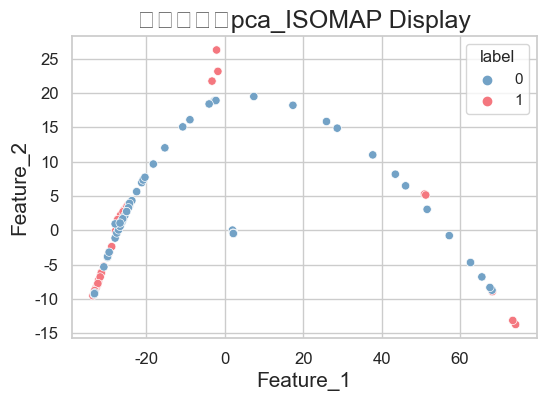

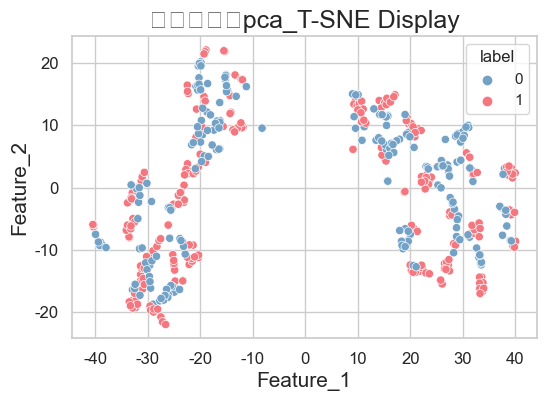

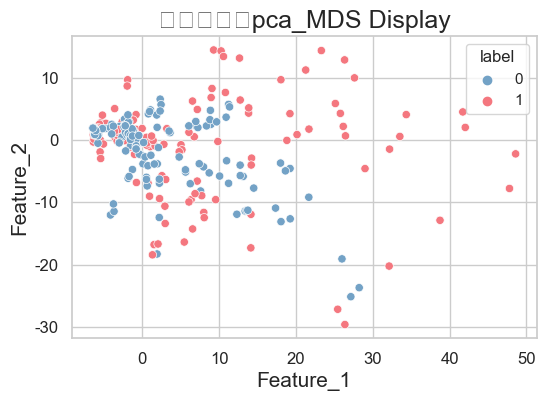

In [128]:
fig_names = ["增强数据后pca_PCA展示", "增强数据后pca_KPCA", "增强数据后pca_ISOMAP", "增强数据后pca_T-SNE", "增强数据后pca_MDS"]
location = "Fig\\3_增强数据_pca\\"
data_enhance_display(x_smote, y_smote, fig_names,location)

## pvalue比较

1,,,,,KstestResult(statistic=0.1341991341991342, pvalue=0.03110043315144815)
2,,,,,KstestResult(statistic=0.16017316017316016, pvalue=0.005269140283100362)
3,,,,,KstestResult(statistic=0.1471861471861472, pvalue=0.013320190858350327)
4,,,,,KstestResult(statistic=0.0735930735930736, pvalue=0.559998541869034)
5,,,,,KstestResult(statistic=0.29004329004329005, pvalue=5.727697508644916e-09)
6,,,,,KstestResult(statistic=0.09090909090909091, pvalue=0.29593614548719527)
7,,,,,KstestResult(statistic=0.06493506493506493, pvalue=0.7159571244787185)
8,,,,,KstestResult(statistic=0.06926406926406926, pvalue=0.6377266721378155)
9,,,,,KstestResult(statistic=0.19480519480519481, pvalue=0.0003004962370505667)
10,,,,,KstestResult(statistic=0.11688311688311688, pvalue=0.08516838224571074)
[1, 2, 3, 5, 9]
5


[1, 2, 3, 5, 9]

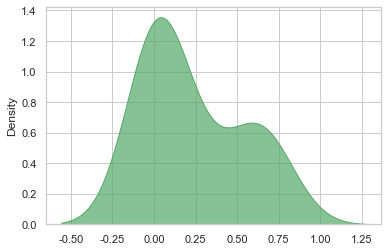

In [129]:
df_steer_tmp_pca,original_fig = pvalue(df_tmp,x_tmp)
df_steer_tmp_pca

## 热图比较

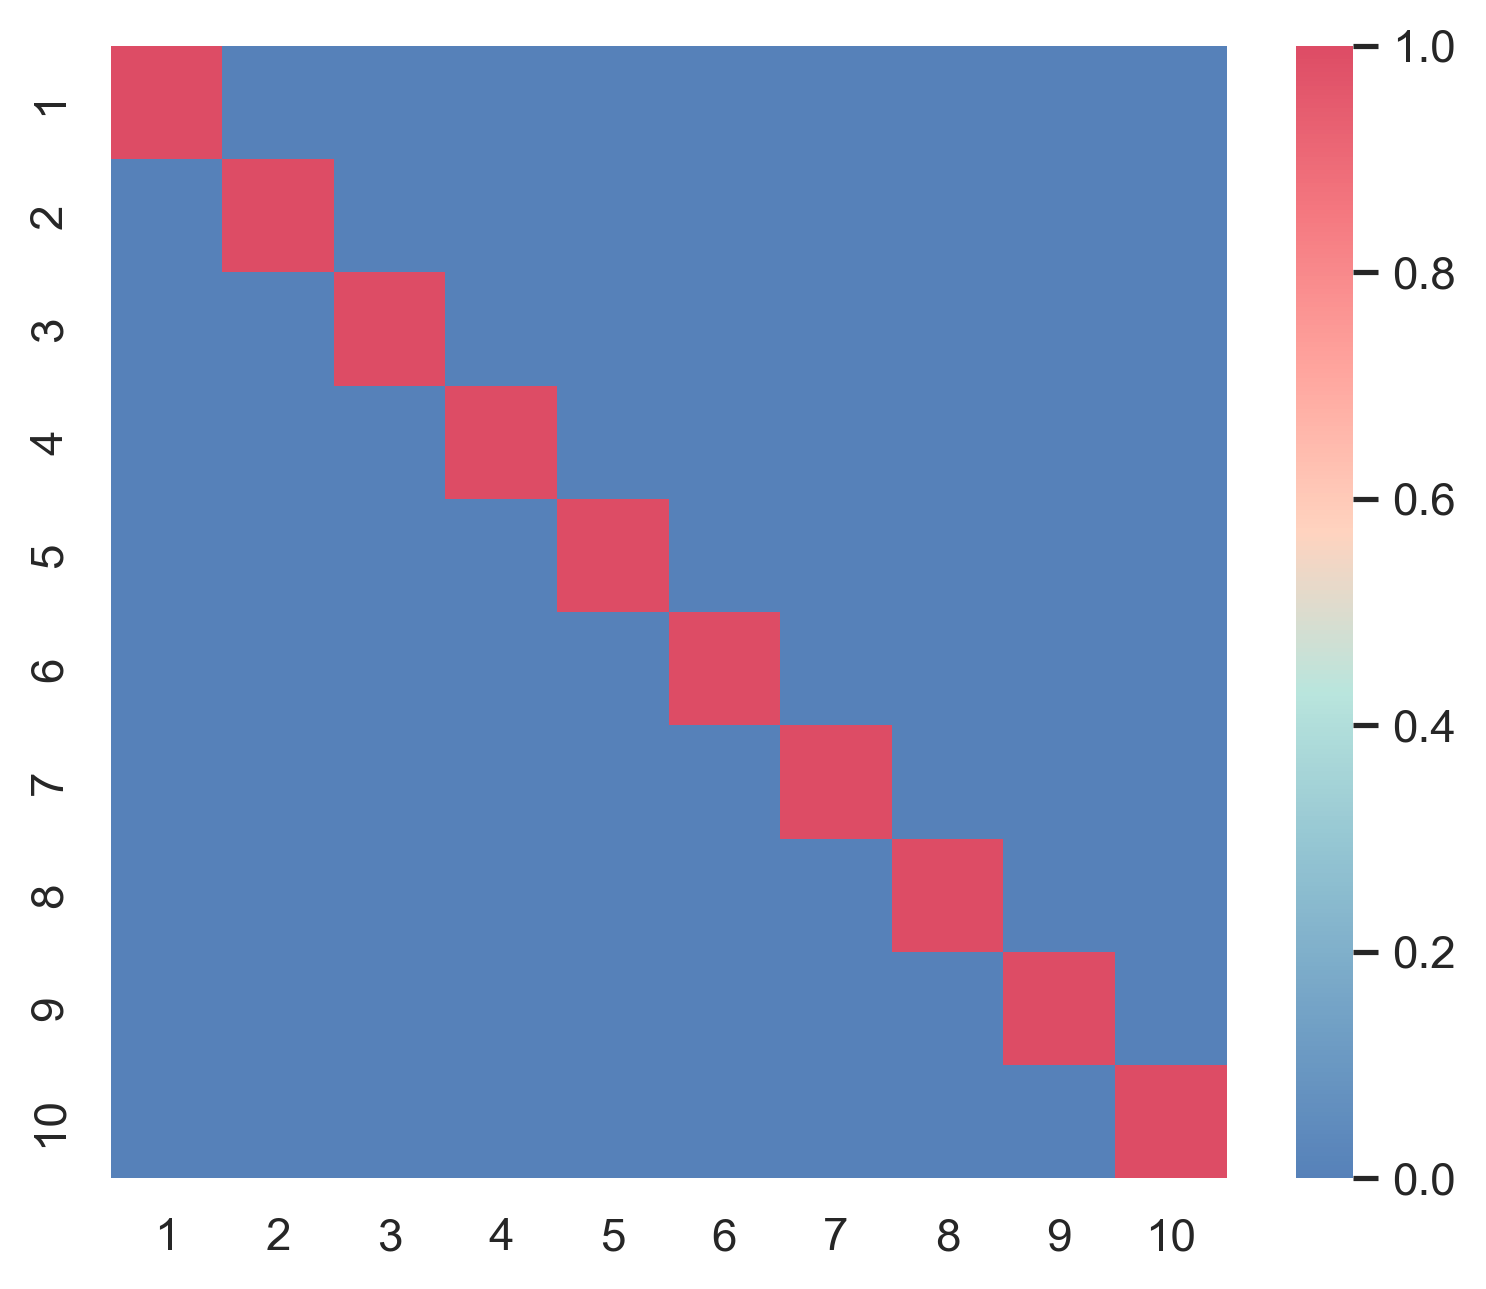

In [130]:
location = "Fig\\3_增强数据_pca\\热图.png"
heatmap_3 = heatmap_fig(x_tmp,location)

## 建模

In [131]:
X_train, X_test, y_train, y_test = train_test_split(
   x_tmp, Y, test_size=0.2, random_state=0, stratify=Y, shuffle=True   # y_imbalance 是 label的那一列
)
scores = cv_score(X_train, y_train, random_state=42)
pred_score = predict_mean_score(scores, X_test)
average_precision = average_precision_score(y_test, pred_score[:, 1])
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Mean Accuracy: 0.808
Mean Precision: 0.809
Mean Recall: 0.811
Mean ROC AUC: 0.897
Average precision-recall score: 0.93


In [132]:
# 我来做一个记录模块，但是记录结果
df_steer_pca = pd.DataFrame({
    "Accuracy": [round_score(scores['test_accuracy'].mean())],
    "Precision": [round_score(scores['test_precision'].mean())],
    "Recall": [round_score(scores['test_recall'].mean())],
    "ROC AUC": [round_score(scores['test_roc_auc'].mean())]
})
df_steer_pca
tmp_steer_pca = df_steer_pca.T
tmp_steer_pca.columns = ['steer_pca']
tmp_steer_pca

steer_pca
Accuracy       0.808
Precision      0.809
Recall         0.811
ROC AUC        0.897

# 四个方法比较

In [133]:
df_all = pd.concat([tmp_original,tmp_pca,tmp_steer,tmp_steer_pca],axis=1)
df_all

original  original_pca  steer  steer_pca
Accuracy      0.857         0.842  0.819      0.808
Precision     0.857         0.858  0.841      0.809
Recall        1.000         0.978  0.784      0.811
ROC AUC       0.465         0.540  0.911      0.897

In [134]:
df_all.columns = ["original","original_pca","smote","smote_pca"]
df_all

original  original_pca  smote  smote_pca
Accuracy      0.857         0.842  0.819      0.808
Precision     0.857         0.858  0.841      0.809
Recall        1.000         0.978  0.784      0.811
ROC AUC       0.465         0.540  0.911      0.897

In [135]:
df_all["label"]=1
for i,name in enumerate(["Accuracy","Precision","Recall","AUC"]):
    df_all["label"].iloc[i] = name
df_all

original  original_pca  smote  smote_pca      label
Accuracy      0.857         0.842  0.819      0.808   Accuracy
Precision     0.857         0.858  0.841      0.809  Precision
Recall        1.000         0.978  0.784      0.811     Recall
ROC AUC       0.465         0.540  0.911      0.897        AUC

In [136]:
df_df_ = df_all.melt(id_vars='label')
df_df_

label      variable  value
0    Accuracy      original  0.857
1   Precision      original  0.857
2      Recall      original  1.000
3         AUC      original  0.465
4    Accuracy  original_pca  0.842
5   Precision  original_pca  0.858
6      Recall  original_pca  0.978
7         AUC  original_pca  0.540
8    Accuracy         smote  0.819
9   Precision         smote  0.841
10     Recall         smote  0.784
11        AUC         smote  0.911
12   Accuracy     smote_pca  0.808
13  Precision     smote_pca  0.809
14     Recall     smote_pca  0.811
15        AUC     smote_pca  0.897

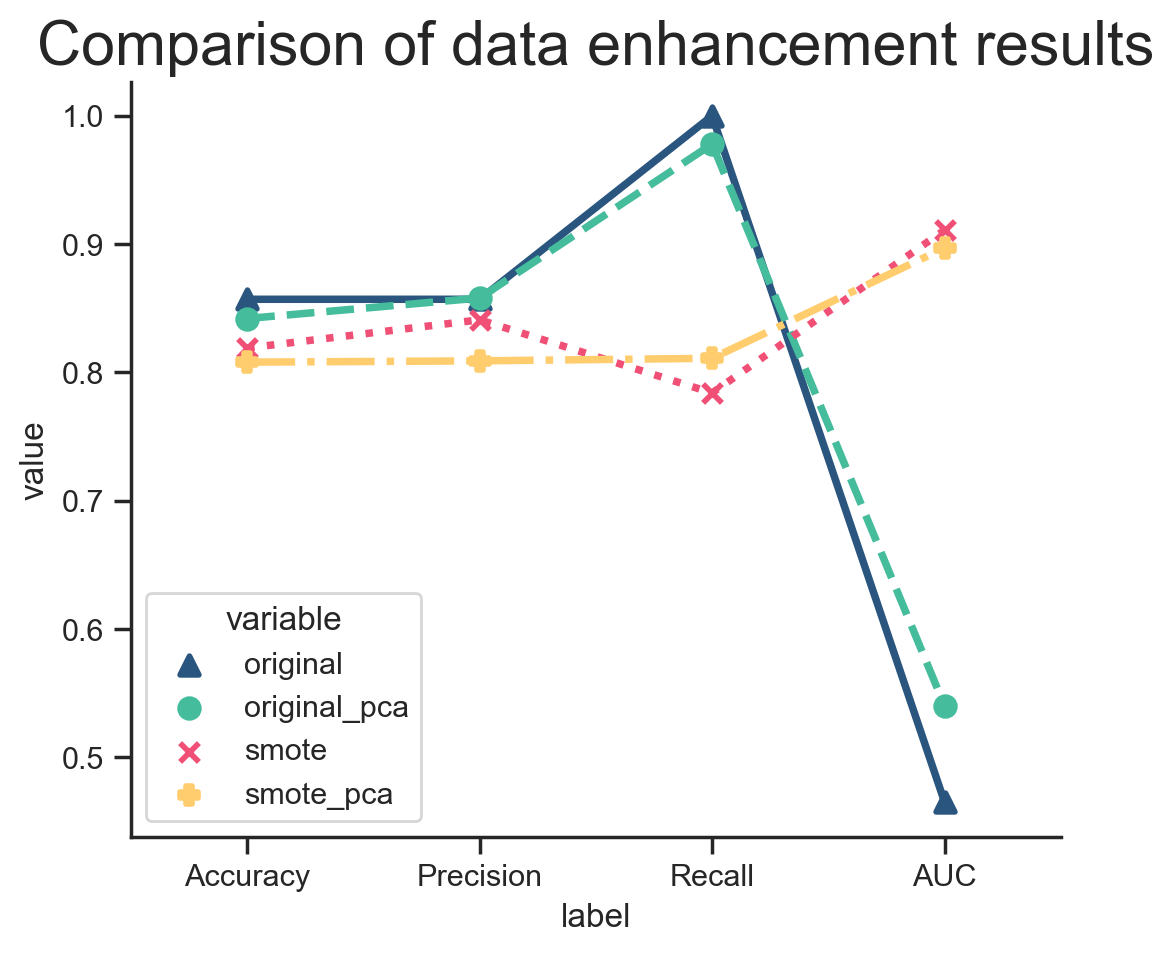

In [137]:
import matplotlib.pyplot as plt

sns.set()
sns.set_theme(style="ticks")
fig = plt.figure(figsize=(6, 5), dpi=200)
ax1 = fig.add_subplot(1, 1, 1)
ax1.set_title("Comparison of data enhancement results", fontsize=22)
sns.pointplot(x="label",
              y="value",
              hue="variable",
              palette={
                  "original": "#2a557f",
                  "original_pca": "#45bc9c",
                  "smote": '#f05076',
                  "smote_pca": '#ffcd6e'
              },
              markers=["^", "o", "x", "P"],
              linestyles=["-", "--", ":", "-."],
              data=df_df_,
              ax=ax1)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.savefig("Fig\\四种方法的选择.png",bbox_inches="tight")
